In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
# import plotly.io as pio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing all datasets

cities = ['amsterdam', 'athens', 'barcelona', 'berlin',
          'budapest', 'lisbon', 'london', 'paris',
          'rome', 'vienna']

days = ['weekdays', 'weekends']

all_airbnb_prices = pd.read_csv("/content/drive/MyDrive/Career/Data_Analyst/Projects/Personal/amsterdam_weekdays.csv",
                                index_col=[0])
all_airbnb_prices['city'] = 'Amsterdam'
all_airbnb_prices['weekday'] = True
count = all_airbnb_prices.shape[0]

i = 0
for city in cities:
  for day in days:
    if i == 0:
      i += 1
      continue
    import_string = "/content/drive/MyDrive/Career/Data_Analyst/Projects/Personal/{}_{}.csv".format(city, day)
    placeholder_df = pd.read_csv(import_string, index_col=[0])
    placeholder_df['city'] = city.capitalize()
    placeholder_df['weekday'] = True if day=="weekdays" else False
    count += placeholder_df.shape[0]
    all_airbnb_prices = pd.concat([all_airbnb_prices, placeholder_df], ignore_index=True)

all_airbnb_prices.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat       city  \
0         4.166708   98.253896         6.846473  4.90569  52.41772  Amsterdam   
1        33.421209  837.280757        58.342928  4.90005  52.37432  Amsterdam   
2         3.985908   95.386955         6.646700  4.97512  52.36103  Amsterdam   
3        26.119108  875.033098        60.973565  4.89417  52.37663  Amsterdam   
4        29.272733  815.305740        56.811677  4.90051  52.37508  Amsterdam   

  weekday  
0    True  
1    True  
2    True  
3    True  
4    True  

[5 rows x 21 columns]

We can get rid of the index columns, they do not provide any information about the AirBnBs.

In [4]:
# Drop redundant/not useful columns

all_airbnb_prices.drop(['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1, inplace=True)

# Change True/False columns to 0/1 columns

all_airbnb_prices[['room_shared', 'room_private',
                 'host_is_superhost', 'weekday']] = all_airbnb_prices[['room_shared',
                                                          'room_private', 'host_is_superhost',
                                                            'weekday']].astype(int)

all_airbnb_prices.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1              2.0   
1  344.245776  Private room            0             1              4.0   
2  264.101422  Private room            0             1              2.0   
3  433.529398  Private room            0             1              4.0   
4  485.552926  Private room            0             1              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                10.0   
1                  0      0    0                 8.0   
2                  0      0    1                 9.0   
3                  0      0    1                 9.0   
4                  1      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist      lng  \
0                        93.0         1  5.022964    2.539380  4.90569   
1                        85.0         1  0.488389    0.239404  4.90005   
2                        87.0         1  5.748312    3.651621  4.97512   
3                        90.0         2  0.384862    0.439876  4.89417   
4                        98.0         1  0.544738    0.318693  4.90051   

        lat       city  weekday  
0  52.41772  Amsterdam        1  
1  52.37432  Amsterdam        1  
2  52.36103  Amsterdam        1  
3  52.37663  Amsterdam        1  
4  52.37508  Amsterdam        1

In [5]:
all_airbnb_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  int64  
 3   room_private                51707 non-null  int64  
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  int64  
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  lng                         517

In [6]:
# The below is to check if the room_type category is one-hot encoded by
# room_private and room_shared

expected_relationships = {
    "Private room": {"room_shared": False, "room_private": True},
    "Shared room": {"room_shared": True, "room_private": False},
    "Entire home/apt": {"room_shared": False, "room_private": False}
}

# Create a mask for each relationship
masks = [
    (all_airbnb_prices["room_type"] == room_type) &
    (all_airbnb_prices["room_shared"] == expected_values["room_shared"]) &
    (all_airbnb_prices["room_private"] == expected_values["room_private"])
    for room_type, expected_values in expected_relationships.items()
]

combined_mask = pd.concat(masks, axis=1).any(axis=1)

# Check for inconsistencies
inconsistent_rows = all_airbnb_prices[~combined_mask]

if not inconsistent_rows.empty:
    print("Column is NOT one-hot encoded")
    print(inconsistent_rows)
else:
    print("Column IS one-hot encoded")

Column IS one-hot encoded


Since the `room_type` column is one-hot encoded by the columns `room_shared` and `room_private`. Therefore, during EDA, the `room_type` column will be explored as a whole and not the `room_private` and `room_shared` columns. The `room_type` column will also be used during prediction using XGBoost, which can handle categorical variables

In [7]:
# Check if values for room_shared, room_private, host_is_superhost, multi, and biz categories are only binary

print("There are {} values in room_shared, room_private, host_is_superhost, multi, and biz categories"
      .format("only binary" if all_airbnb_prices[['room_shared', 'room_private',
                                                'host_is_superhost', 'multi', 'biz']]
              .isin([0, 1]).all().all() else "non-binary"))

# Check that every column other than lng and lat have non negative values

print("There are {}negative non-coordinate values".format("no " if
                                (all_airbnb_prices.drop(['lat', 'lng',
                                                       'room_type', 'city', 'weekday'], axis=1) >= 0).all().all() else ""))

There are only binary values in room_shared, room_private, host_is_superhost, multi, and biz categories
There are no negative non-coordinate values


There are no null values, no non-negative non-coordinate values, and the boolean columns have binary values. The data appears to be clean.

In [8]:
all_airbnb_prices.describe(include='all')

realSum        room_type   room_shared  room_private  \
count   51707.000000            51707  51707.000000  51707.000000   
unique           NaN                3           NaN           NaN   
top              NaN  Entire home/apt           NaN           NaN   
freq             NaN            32648           NaN           NaN   
mean      279.879591              NaN      0.007078      0.361518   
std       327.948386              NaN      0.083835      0.480445   
min        34.779339              NaN      0.000000      0.000000   
25%       148.752174              NaN      0.000000      0.000000   
50%       211.343089              NaN      0.000000      0.000000   
75%       319.694287              NaN      0.000000      1.000000   
max     18545.450285              NaN      1.000000      1.000000   

        person_capacity  host_is_superhost         multi           biz  \
count      51707.000000       51707.000000  51707.000000  51707.000000   
unique              NaN                NaN           NaN           NaN   
top                 NaN                NaN           NaN           NaN   
freq                NaN                NaN           NaN           NaN   
mean           3.161661           0.255903      0.291353      0.350204   
std            1.298545           0.436372      0.454390      0.477038   
min            2.000000           0.000000      0.000000      0.000000   
25%            2.000000           0.000000      0.000000      0.000000   
50%            3.000000           0.000000      0.000000      0.000000   
75%            4.000000           1.000000      1.000000      1.000000   
max            6.000000           1.000000      1.000000      1.000000   

        cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count         51707.000000                51707.000000  51707.00000   
unique                 NaN                         NaN          NaN   
top                    NaN                         NaN          NaN   
freq                   NaN                         NaN          NaN   
mean              9.390624                   92.628232      1.15876   
std               0.954868                    8.945531      0.62741   
min               2.000000                   20.000000      0.00000   
25%               9.000000                   90.000000      1.00000   
50%              10.000000                   95.000000      1.00000   
75%              10.000000                   99.000000      1.00000   
max              10.000000                  100.000000     10.00000   

                dist    metro_dist           lng           lat    city  \
count   51707.000000  51707.000000  51707.000000  51707.000000   51707   
unique           NaN           NaN           NaN           NaN      10   
top              NaN           NaN           NaN           NaN  London   
freq             NaN           NaN           NaN           NaN    9993   
mean        3.191285      0.681540      7.426068     45.671128     NaN   
std         2.393803      0.858023      9.799725      5.249263     NaN   
min         0.015045      0.002301     -9.226340     37.953000     NaN   
25%         1.453142      0.248480     -0.072500     41.399510     NaN   
50%         2.613538      0.413269      4.873000     47.506690     NaN   
75%         4.263077      0.737840     13.518825     51.471885     NaN   
max        25.284557     14.273577     23.786020     52.641410     NaN   

             weekday  
count   51707.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.493163  
std         0.499958  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [9]:
all_listings = all_airbnb_prices.groupby('city').realSum.count().reset_index()
weekday_listings = all_airbnb_prices.groupby('city').weekday.sum().reset_index()
weekday_listing_counts = pd.merge(all_listings, weekday_listings)
weekday_listing_counts['all_listings'] = weekday_listing_counts['realSum']
weekday_listing_counts['weekdays'] = weekday_listing_counts['weekday']
weekday_listing_counts['weekends'] = weekday_listing_counts['realSum'] - weekday_listing_counts['weekdays']
weekday_listing_counts['weekday_perc'] = weekday_listing_counts.apply(lambda row:
                                                                round((row['weekdays'] / row['all_listings'] * 100), 1), axis=1)
weekday_listing_counts = weekday_listing_counts.sort_values('weekday_perc', ascending=False).reset_index()
weekday_listing_counts['weekday_perc'] = weekday_listing_counts.weekday_perc.apply(lambda x: str(x)+"%")
weekday_listing_counts.drop(['realSum', 'weekday', 'index'], axis=1, inplace=True)

all_weekdays = weekday_listing_counts['weekdays'].sum()
total_listings = weekday_listing_counts['all_listings'].sum()
total_perc = round(all_weekdays/total_listings * 100, 1)

print("Total Weekday Percentage: ", total_perc, "%")

weekday_listing_counts

Total Weekday Percentage:  49.3 %


city  all_listings  weekdays  weekends weekday_perc
0  Barcelona          2833      1555      1278        54.9%
1  Amsterdam          2080      1103       977        53.0%
2     Berlin          2484      1284      1200        51.7%
3   Budapest          4022      2074      1948        51.6%
4     Athens          5280      2653      2627        50.2%
5       Rome          9027      4492      4535        49.8%
6     Lisbon          5763      2857      2906        49.6%
7     Vienna          3537      1738      1799        49.1%
8      Paris          6688      3130      3558        46.8%
9     London          9993      4614      5379        46.2%

The number of weekday entries and weekend entries are approximately equal across all cities, so the dataset is fairly balanced.

In [10]:
weekday_weekend_airbnbs = all_airbnb_prices[all_airbnb_prices.duplicated(subset=["lat", "lng"], keep=False)]
weekday_weekend_airbnbs = weekday_weekend_airbnbs.sort_values("lat")
all_airbnb_prices['duplicated'] = all_airbnb_prices.duplicated(subset=["lat", "lng"], keep='last')

#Trnasforming with groupby
weekday_weekend_airbnbs['price_difference'] = (
  weekday_weekend_airbnbs.groupby(["lat", "lng"])['realSum'].transform(lambda x: x.max() - x.min())
)

different_priced_duplicates = weekday_weekend_airbnbs[weekday_weekend_airbnbs['price_difference'] > 0.1]

if len(different_priced_duplicates) > 0:
  print("Prices for weekday and weekend entries of the same AirBnB are NOT the same")
else:
  print("Prices for weekday and weekend entries of the same AirBnB ARE the same")

different_priced_duplicates = different_priced_duplicates.drop(columns='price_difference')

different_priced_duplicates.head(6)

Prices for weekday and weekend entries of the same AirBnB are NOT the same


realSum        room_type  room_shared  room_private  person_capacity  \
6614   87.877581  Entire home/apt            0             0              4.0   
3721   92.798725  Entire home/apt            0             0              4.0   
6741   85.768519  Entire home/apt            0             0              6.0   
4701   92.798725  Entire home/apt            0             0              5.0   
2382   81.081714  Entire home/apt            0             0              4.0   
4340  104.281396  Entire home/apt            0             0              2.0   

      host_is_superhost  multi  biz  cleanliness_rating  \
6614                  0      0    0                10.0   
3721                  0      0    0                10.0   
6741                  0      0    1                10.0   
4701                  1      1    0                10.0   
2382                  1      0    0                 9.0   
4340                  0      0    1                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist      lng  \
6614                        93.0         1  1.997930    0.454652  23.7391   
3721                        93.0         1  1.997904    0.454679  23.7391   
6741                       100.0         2  2.117541    0.230988  23.7260   
4701                       100.0         3  2.192079    0.405751  23.7240   
2382                        96.0         2  2.192081    0.405764  23.7240   
4340                        95.0         1  2.117541    0.230980  23.7260   

           lat    city  weekday  
6614  37.95781  Athens        0  
3721  37.95781  Athens        1  
6741  37.95800  Athens        0  
4701  37.95800  Athens        1  
2382  37.95800  Athens        1  
4340  37.95800  Athens        1

In [11]:
realSum_rank_df = different_priced_duplicates.groupby("city").realSum.mean()
realSum_rank = realSum_rank_df.sort_values().index

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for AirBnBs with Different Prices on Weekdays and Weekends')

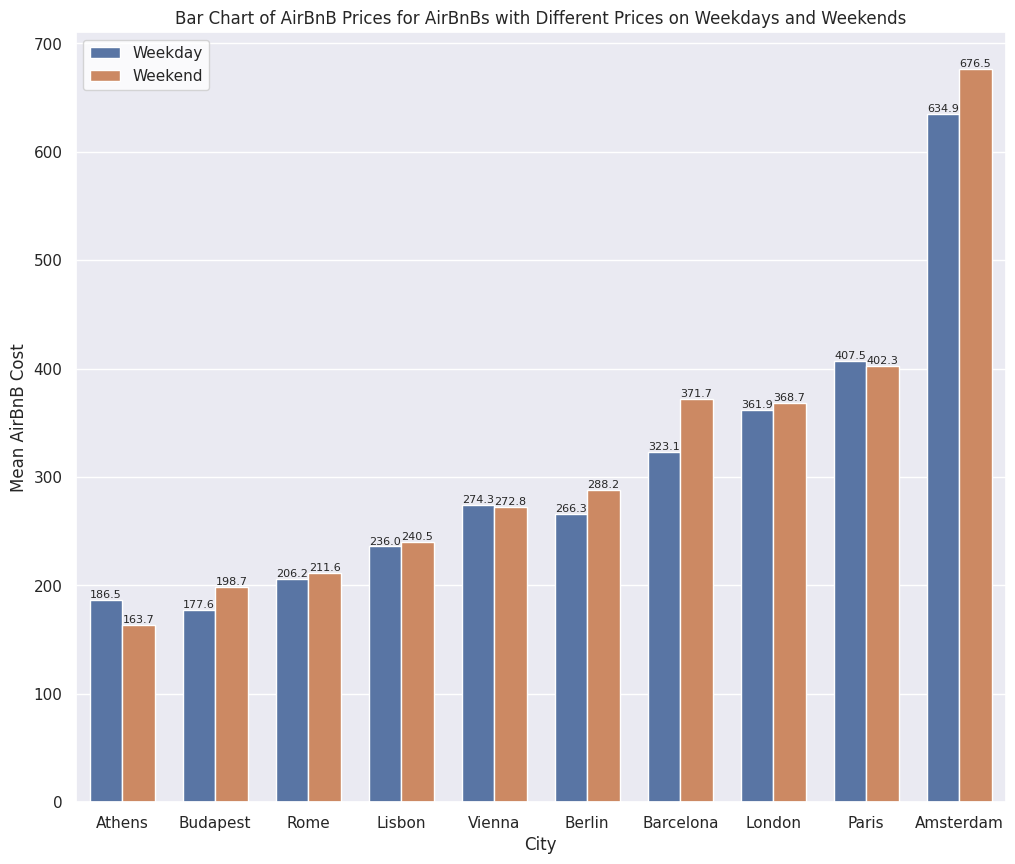

In [12]:
plt.figure(figsize=(12,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="weekday",
            data=different_priced_duplicates, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=[1, 0], width=0.7)
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.1f')
plt.legend(loc='upper left', labels=['Weekday', 'Weekend'], facecolor='white')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for AirBnBs with Different Prices on Weekdays and Weekends')

Text(0.5, 1.0, 'Bar Chart of Percentage Difference of AirBnB Prices from Weekends to Weekdays for AirBnBs with Different Prices on Weekdays and Weekends')

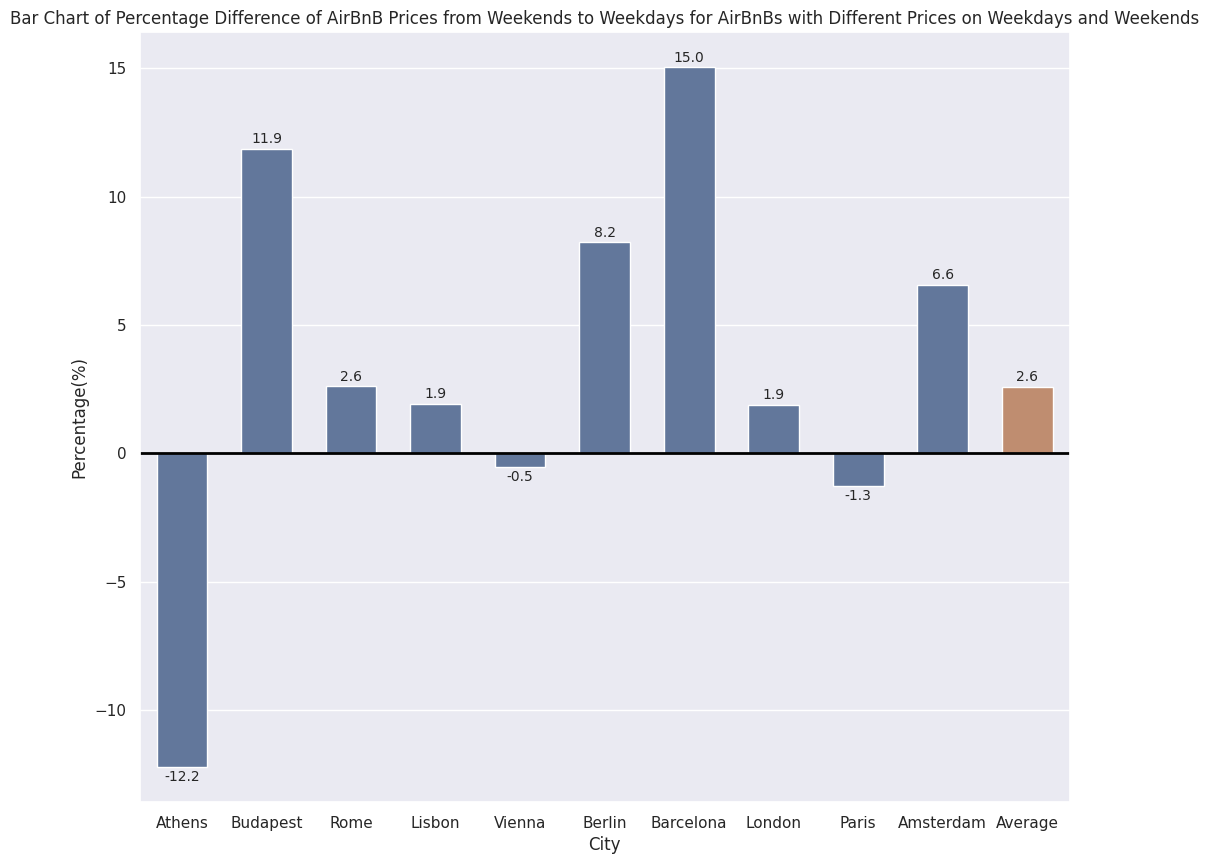

In [13]:
duplicated_weekday_sum = different_priced_duplicates.query('weekday == 1')['realSum'].sum()
duplicated_weekend_sum = different_priced_duplicates.query('weekday == 0')['realSum'].sum()
average_duplicated_difference_perc = round((duplicated_weekend_sum - duplicated_weekday_sum)/duplicated_weekday_sum * 100, 1)

duplicate_means = different_priced_duplicates.groupby(["city", 'weekday']).realSum.mean().reset_index()
duplicate_means['city'] = pd.Categorical(duplicate_means['city'], categories=realSum_rank, ordered=True)
duplicate_means = duplicate_means.sort_values(by='city')
grouped_duplicates = duplicate_means.pivot(index="city", columns="weekday", values="realSum")
grouped_duplicates['percentage'] = (grouped_duplicates[0] - grouped_duplicates[1])/grouped_duplicates[1] * 100
cities = grouped_duplicates.index.tolist()
cities.append("Average")
percentages = grouped_duplicates.percentage.tolist()
percentages.append(average_duplicated_difference_perc)


plt.figure(figsize=(12,10))
color_palette = ["#5975A4"] * 11
color_palette[10] = '#CC8963'
bar_plot = sns.barplot(x = cities, y = percentages, palette = color_palette,
                       width=0.6)
plt.rcParams['font.size'] = 10
bar_plot.bar_label(bar_plot.containers[0], fmt='%.1f', padding=2)
bar_plot.axhline(0, color='black', linewidth=2)
plt.xlabel('City')
plt.ylabel("Percentage(%)")
plt.title('Bar Chart of Percentage Difference of AirBnB Prices from Weekends to Weekdays for AirBnBs with Different Prices on Weekdays and Weekends')

AirBnBs listed with different prices on weekdays and weekends are generally priced higher on the weekends. Averaged across all the cities, the increase in price is about 2.6% from weekdays to weekends for such AirBnBs. The difference is particularly pronounced in Barcelona, with a 15% increase from weekdays to weekends. Surprisingly weekend prices are 12.2% lower in Athens. This may be indicative of how Athens is treated as a travel destination: maybe the ratio of business to leisure travellers is higher in Athens as compared to the other locations. However, this cannot be derived simply from the above plot.

From the previous barchart it can be seen that Athens has the lowest average AirBnB price. This might suggest that Athens is not the most appealing holiday location and that the reduction of price in the weekends aims to entice more holiday-goers to come to Athens over the weekend.

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated on Weekdays and Weekends')

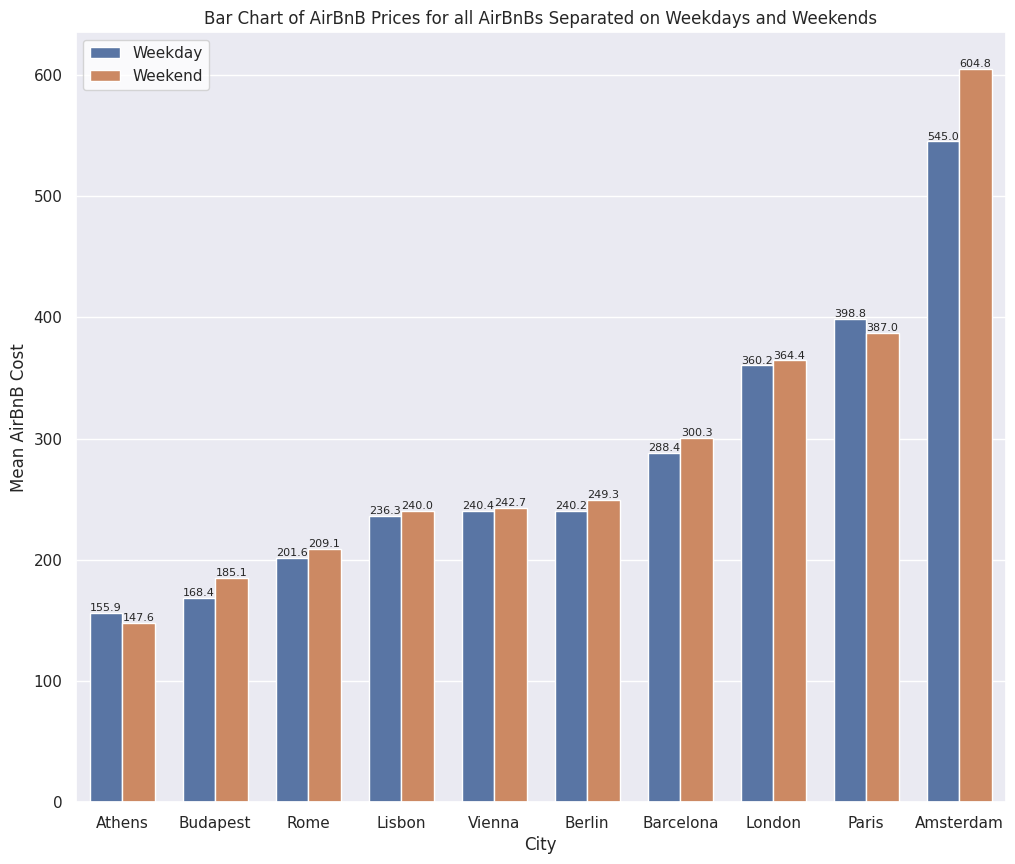

In [14]:
plt.figure(figsize=(12,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="weekday",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=[1, 0], width=0.7)
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.1f')
plt.legend(loc='upper left', labels=['Weekday', 'Weekend'], facecolor='white')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated on Weekdays and Weekends')

Athens has the lowest AirBnB prices, while Amsterdam has the highest AirBnB prices by far.

Text(0.5, 1.0, 'Bar Chart of Percentage Difference of AirBnB Prices from Weekends to Weekdays for all AirBnBs')

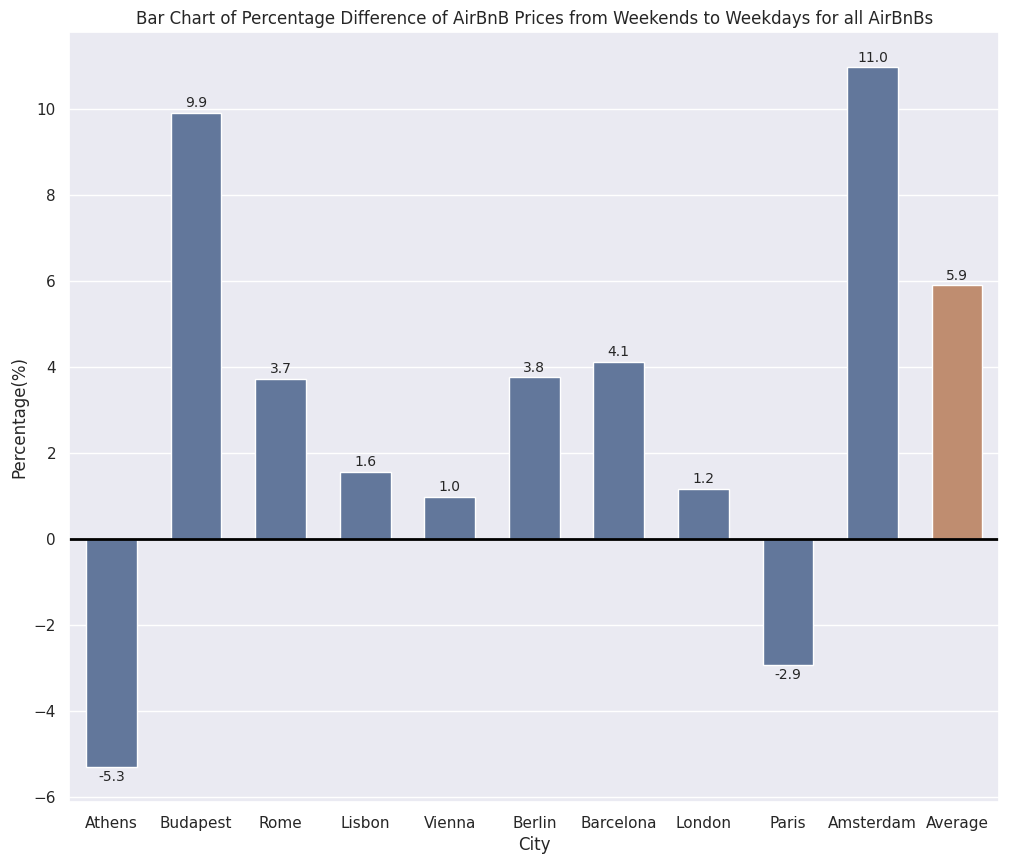

In [15]:
weekday_sum = all_airbnb_prices.query('weekday == 1')['realSum'].sum()
weekend_sum = all_airbnb_prices.query('weekday == 0')['realSum'].sum()
average_difference_perc = round((weekend_sum - weekday_sum)/weekday_sum * 100, 1)

means = all_airbnb_prices.groupby(["city", 'weekday']).realSum.mean().reset_index()
means['city'] = pd.Categorical(means['city'], categories=realSum_rank, ordered=True)
means = means.sort_values(by='city')
grouped_means = means.pivot(index="city", columns="weekday", values="realSum")
grouped_means['percentage'] = (grouped_means[0] - grouped_means[1])/grouped_means[1] * 100
percentages_all = grouped_means.percentage.tolist()
percentages_all.append(average_difference_perc)

plt.figure(figsize=(12,10))
bar_plot = sns.barplot(x = cities, y = percentages_all, palette = color_palette,
                       width=0.6)
plt.rcParams['font.size'] = 10
bar_plot.bar_label(bar_plot.containers[0], fmt='%.1f', padding=2)
bar_plot.axhline(0, color='black', linewidth=2)
plt.xlabel('City')
plt.ylabel("Percentage(%)")
plt.title('Bar Chart of Percentage Difference of AirBnB Prices from Weekends to Weekdays for all AirBnBs')

All AirBnBs are generally priced higher on the weekends. Averaged across all the cities, the increase in price is about 5.9% from weekdays to weekends. The difference is particularly pronounced in Amsterdam, with a 11% increase from weekdays to weekends. Weekend prices are once again lower in Athens, this time by 5.3%. Surprisingly, Budapest has a 9.9% increase from weekdays to weekends, despite having the second lowest prices for AirBnBs across all the listed European cities. More information about the reason for travel to Budapest would be useful.

Text(0.5, 1.0, 'Histograms of AirBnB Prices')

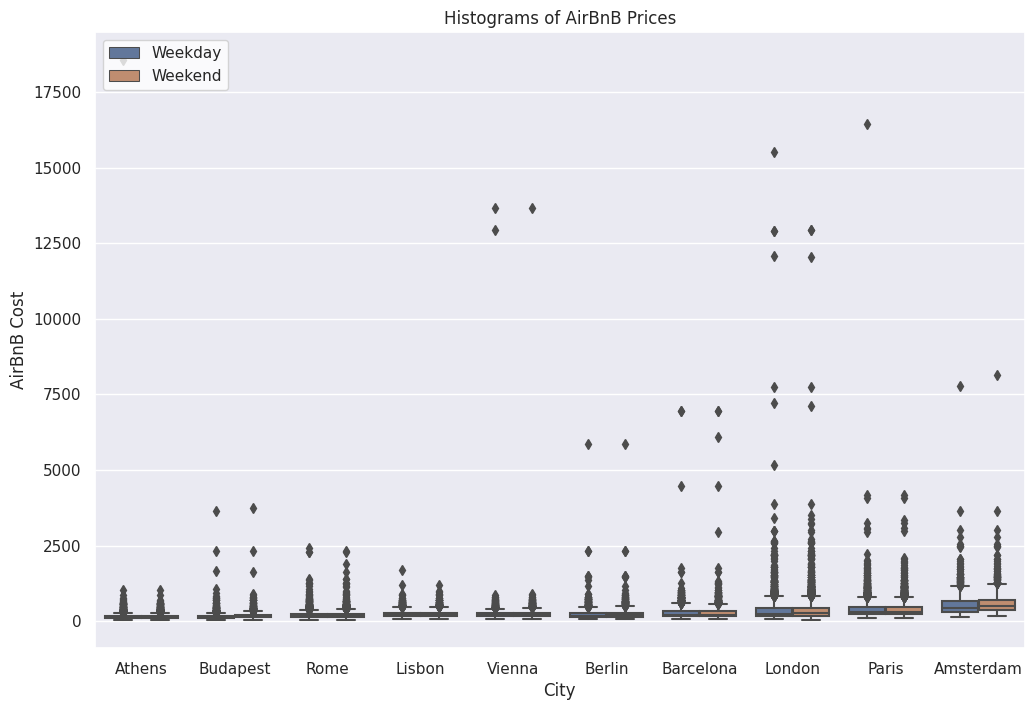

In [16]:
plt.figure(figsize=(12, 8))
sns.set_theme()
box_plot = sns.boxplot(x="city", y="realSum", hue="weekday",
            data=all_airbnb_prices, order=realSum_rank, palette = ["#5975A4", '#CC8963'],
            hue_order=[1, 0])
plt.legend(loc='upper left', facecolor='white')
plt.ylabel('AirBnB Cost')
plt.xlabel('City')
box_plot.legend_.set_title('')  # Remove default legend title
new_labels = ['Weekday', 'Weekend']  # Change the legend labels
for text, label in zip(box_plot.legend_.texts, new_labels):
    text.set_text(label)
plt.title('Histograms of AirBnB Prices')

The above histograms are to approximate the value from which the extreme outliers are apparent. This is mainly to prevent these outliers resulting in bias during prediction. We can observe that the most extreme outliers start at approximately **4000**.

Text(0.5, 1.0, 'Histograms of AirBnB Prices')

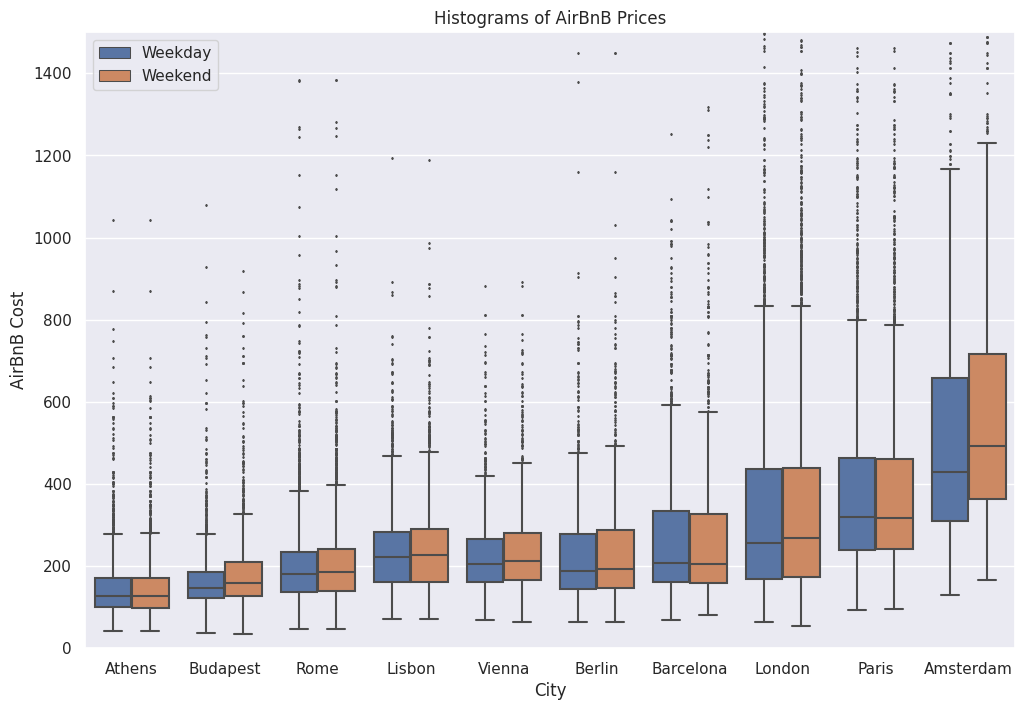

In [17]:
plt.figure(figsize=(12, 8))
sns.set_theme()
box_plot = sns.boxplot(x="city", y="realSum", hue="weekday",
            data=all_airbnb_prices, order=realSum_rank, fliersize=1,
            hue_order=[1, 0])
plt.ylim(0, 1500)
plt.ylabel('AirBnB Cost')
plt.xlabel('City')
box_plot.legend_.set_title('')  # Remove default legend title
new_labels = ['Weekday', 'Weekend']  # Change the legend labels
for text, label in zip(box_plot.legend_.texts, new_labels):
    text.set_text(label)
plt.title('Histograms of AirBnB Prices')

From the histograms above it can be observed that London and Amsterdam have the widest range of AirBnB prices. Amsterdam in particular has the widest range of AirBnB prices. However, London has the most expensive AirBnBs, as can be observed by the much higher number of AirBnBs in London with prices above 2500 as compared to those from other cities.

In [18]:
# Marking Outliers

all_airbnb_prices['outlier_4000'] = all_airbnb_prices['realSum'] > 4000
upper_bounds = {}

def find_outliers(city, column, day):

  q1 = np.quantile(all_airbnb_prices.query("city == @city and weekday == @day")[column], 0.25)
  q3 = np.quantile(all_airbnb_prices.query("city == @city and weekday == @day")[column], 0.75)

  iqr = q3-q1

  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)
  city_day_str = '{} {}'.format(city, "Weekday" if day else "Weekend")
  upper_bounds[city_day_str] = upper_bound

  outlier_mask = ((all_airbnb_prices[column] > upper_bound) &
                  (all_airbnb_prices['city'] == city) &
                  (all_airbnb_prices['weekday'] == day))
  return outlier_mask

cities = all_airbnb_prices['city'].unique().tolist()
mask_list = []
for city_name in cities:
  for day in range(0, 2):
    mask_list.append(find_outliers(city=city_name, column='realSum', day=day))

full_outlier_mask = mask_list[0]
for i in range (1, len(mask_list)):
  full_outlier_mask = full_outlier_mask | mask_list[i]

all_airbnb_prices['all_outliers'] = full_outlier_mask

print(upper_bounds)

{'Amsterdam Weekend': 1247.392965106742, 'Amsterdam Weekday': 1178.614111967755, 'Athens Weekend': 280.85674782649454, 'Athens Weekday': 279.4507065357486, 'Barcelona Weekend': 578.4381036609491, 'Barcelona Weekday': 595.4569786114926, 'Berlin Weekend': 496.0502944750864, 'Berlin Weekday': 476.9152566140039, 'Budapest Weekend': 330.0512290266485, 'Budapest Weekday': 278.7047046106124, 'Lisbon Weekend': 480.6226547842401, 'Lisbon Weekday': 469.7467166979363, 'London Weekend': 833.9213057691854, 'London Weekday': 837.4491403842987, 'Paris Weekend': 791.3423897846958, 'Paris Weekday': 798.6531829620656, 'Rome Weekend': 398.7328454866388, 'Rome Weekday': 383.8870315385874, 'Vienna Weekend': 452.34088306102893, 'Vienna Weekday': 423.2697566790548}


In [19]:
num_outliers = all_airbnb_prices[all_airbnb_prices['all_outliers'] == True].shape[0]
print(num_outliers)

2737


In [20]:
room_type_count = all_airbnb_prices[all_airbnb_prices['duplicated'] == False]['room_type'].value_counts()

room_type_count

Entire home/apt    19411
Private room       10509
Shared room          205
Name: room_type, dtype: int64

In [21]:
bedrooms_count = all_airbnb_prices[all_airbnb_prices['duplicated'] == False]['bedrooms'].value_counts()

bedrooms_count.sort_index()

0      2607
1     20874
2      5648
3       924
4        57
5         6
6         1
8         1
9         6
10        1
Name: bedrooms, dtype: int64

In [22]:
person_capacity_count = all_airbnb_prices[all_airbnb_prices['duplicated'] == False]['person_capacity'].value_counts()

person_capacity_count.sort_index()

2.0    13874
3.0     3540
4.0     8332
5.0     1779
6.0     2600
Name: person_capacity, dtype: int64

In [23]:
cleanliness_rating_count = all_airbnb_prices[all_airbnb_prices['duplicated'] == False]['cleanliness_rating'].value_counts()

cleanliness_rating_count.sort_index(ascending=False)

10.0    17478
9.0      9063
8.0      2537
7.0       543
6.0       288
5.0        51
4.0        79
3.0         6
2.0        80
Name: cleanliness_rating, dtype: int64

In [24]:
guest_satisfaction_overall_count = all_airbnb_prices[all_airbnb_prices['duplicated'] == False]['guest_satisfaction_overall'].value_counts()

guest_satisfaction_overall_count.sort_index(ascending=False)

100.0    6167
99.0     1426
98.0     2321
97.0     2126
96.0     2083
95.0     1918
94.0     1535
93.0     1921
92.0     1161
91.0     1055
90.0     1508
89.0      773
88.0      806
87.0      734
86.0      443
85.0      440
84.0      389
83.0      341
82.0      197
81.0      125
80.0     1172
79.0       96
78.0       95
77.0       99
76.0       96
75.0      102
74.0       46
73.0      107
72.0       40
71.0       27
70.0      155
69.0       20
68.0       20
67.0       58
66.0        4
65.0       21
64.0        7
63.0       12
62.0        3
61.0        1
60.0      263
57.0        2
56.0        3
55.0        2
54.0        1
53.0        9
50.0       26
47.0        9
46.0        1
44.0        1
40.0       68
30.0        4
20.0       86
Name: guest_satisfaction_overall, dtype: int64

In [25]:
def classify_cleanliness(cleanliness):
  if cleanliness > 9:
    return '10'
  elif cleanliness > 8:
    return '9'
  elif cleanliness > 7:
    return '8'
  elif cleanliness > 6:
    return '7'
  else:
    return '6≥'

def classify_satisfaction(satisfaction):
  if satisfaction > 94:
    return '95-100'
  elif satisfaction > 89:
    return '90-94'
  elif satisfaction > 79:
    return '80-89'
  elif satisfaction > 60:
    return '61-79'
  else:
    return '60≥'

def classify_bedrooms(bedrooms):
  if bedrooms > 2:
    return '3≤'
  elif bedrooms == 2:
    return '2'
  elif bedrooms == 1:
    return '1'
  else:
    return '0'

In [26]:
all_airbnb_prices['cleanliness_class'] = all_airbnb_prices['cleanliness_rating'].apply(classify_cleanliness)
all_airbnb_prices['bedroom_class'] = all_airbnb_prices['bedrooms'].apply(classify_bedrooms)
all_airbnb_prices['satisfaction_class'] = all_airbnb_prices['guest_satisfaction_overall'].apply(classify_satisfaction)
all_airbnb_prices['person_capacity_class'] = all_airbnb_prices['person_capacity'].astype('int')

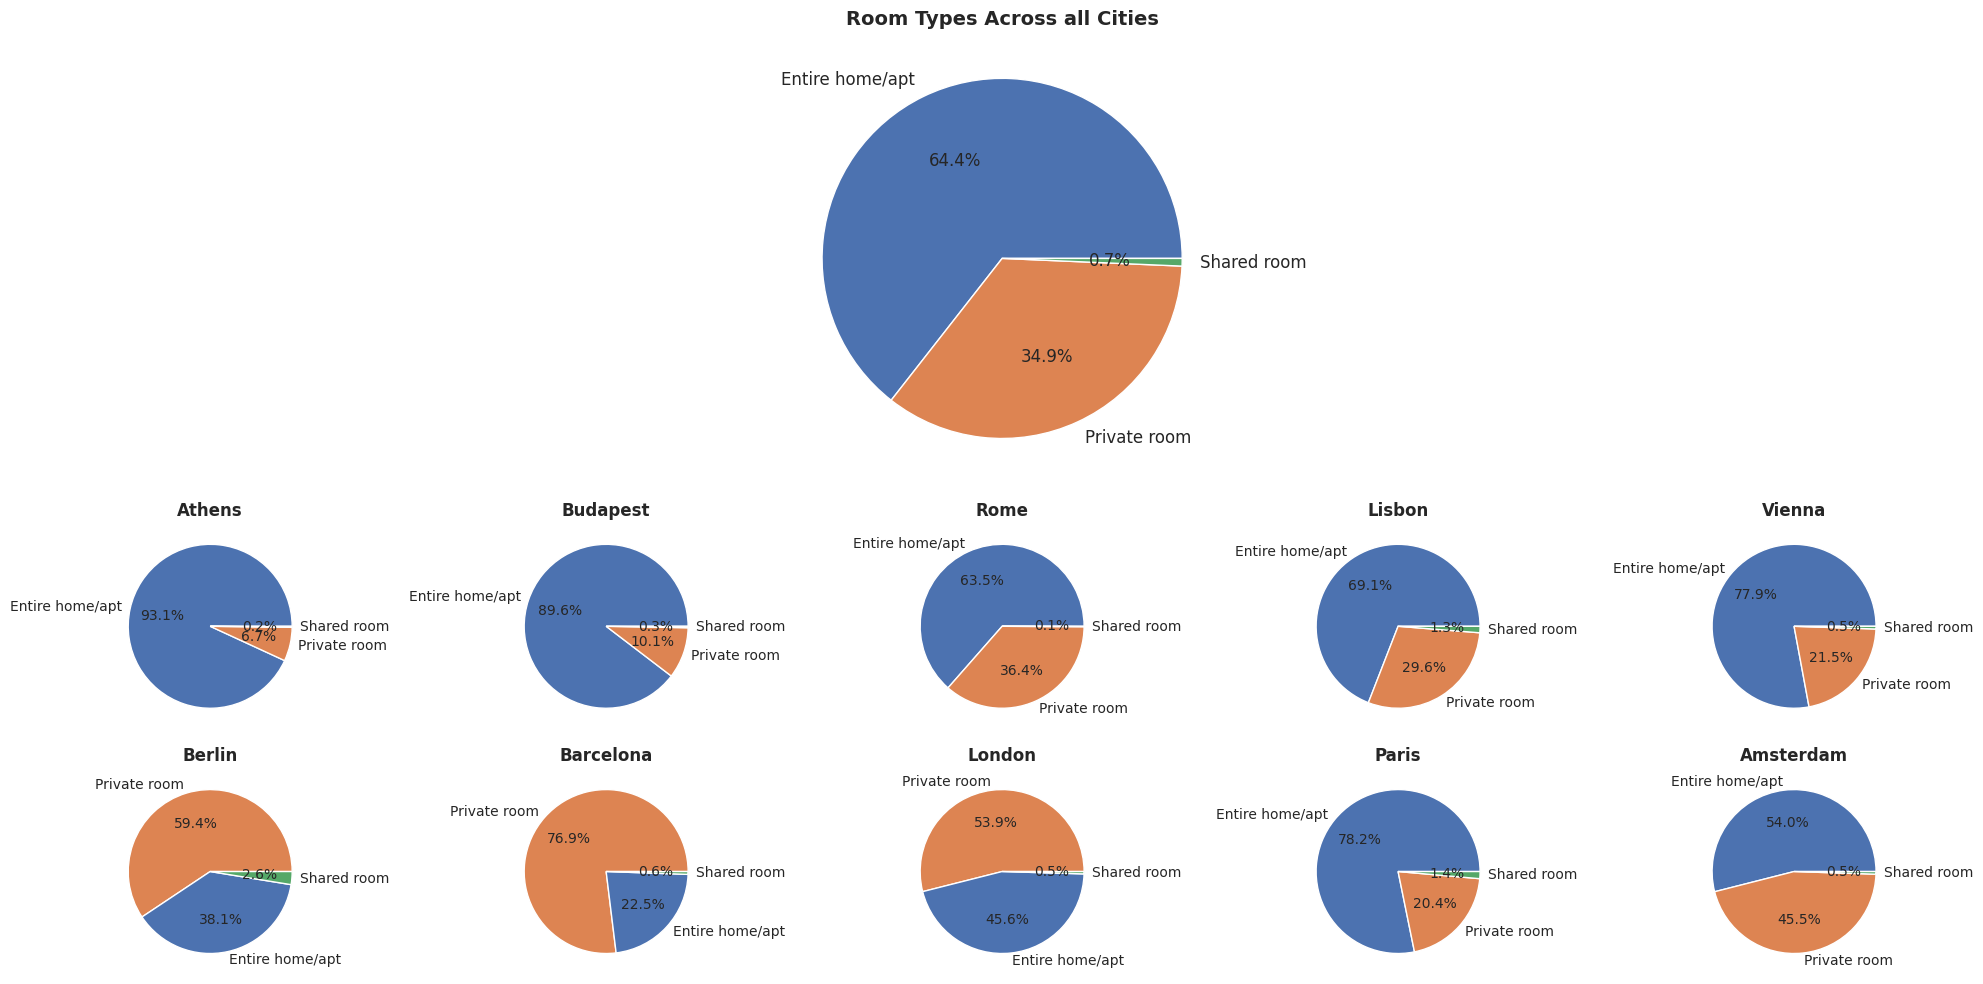

In [27]:
room_type_color_dict = {
    'Entire home/apt': '#4C72B0',
    'Private room': '#DD8452',
    'Shared room': '#55A868',
}

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 5)

ax = fig.add_subplot(gs[0:2, 1:4])
room_type_counts = all_airbnb_prices.query("duplicated == False")['room_type'].value_counts()
room_type_values = room_type_counts.index.tolist()
room_type_freqs = room_type_counts.values.tolist()
ax.pie(room_type_freqs, labels=room_type_values, autopct='%2.1f%%', textprops={'size':12}, colors=[room_type_color_dict[room] for room in room_type_values])
plt.title("Room Types Across all Cities", fontsize=14, fontweight='bold')
plt.ylabel(None)

for i, city in enumerate(realSum_rank):
  ax = fig.add_subplot(gs[i//5 + 2, i%5])
  room_type_counts = all_airbnb_prices.query("duplicated == False and city == @city")['room_type'].value_counts()
  room_type_values = room_type_counts.index.tolist()
  room_type_freqs = room_type_counts.values.tolist()
  ax.pie(room_type_freqs, labels=room_type_values, autopct='%2.1f%%', textprops={'size':10}, colors=[room_type_color_dict[room] for room in room_type_values])
  plt.title(city, fontsize=12, fontweight='bold')
  plt.ylabel(None)

plt.tight_layout()

While this format is intuitive, it does end up making the charts difficult to read. It will probably be best to separate the total and city-by-city break downs of each statistic.

Text(0, 0.5, '')

<Figure size 700x500 with 0 Axes>

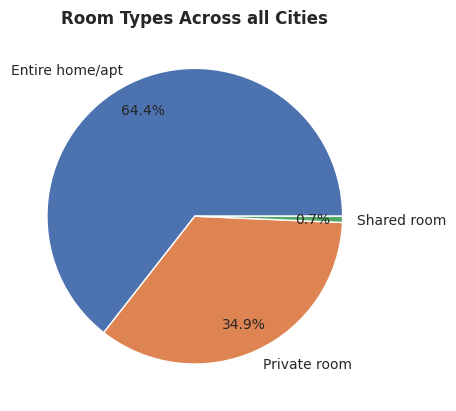

In [28]:
plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()
room_type_counts = all_airbnb_prices.query("duplicated == False")['room_type'].value_counts()
room_type_values = room_type_counts.index.tolist()
room_type_freqs = room_type_counts.values.tolist()
ax.pie(room_type_freqs, labels=room_type_values, autopct='%2.1f%%', textprops={'size':10}, colors=[room_type_color_dict[room] for room in room_type_values], pctdistance=0.8)
plt.title("Room Types Across all Cities", fontsize=12, fontweight='bold')
plt.ylabel(None)

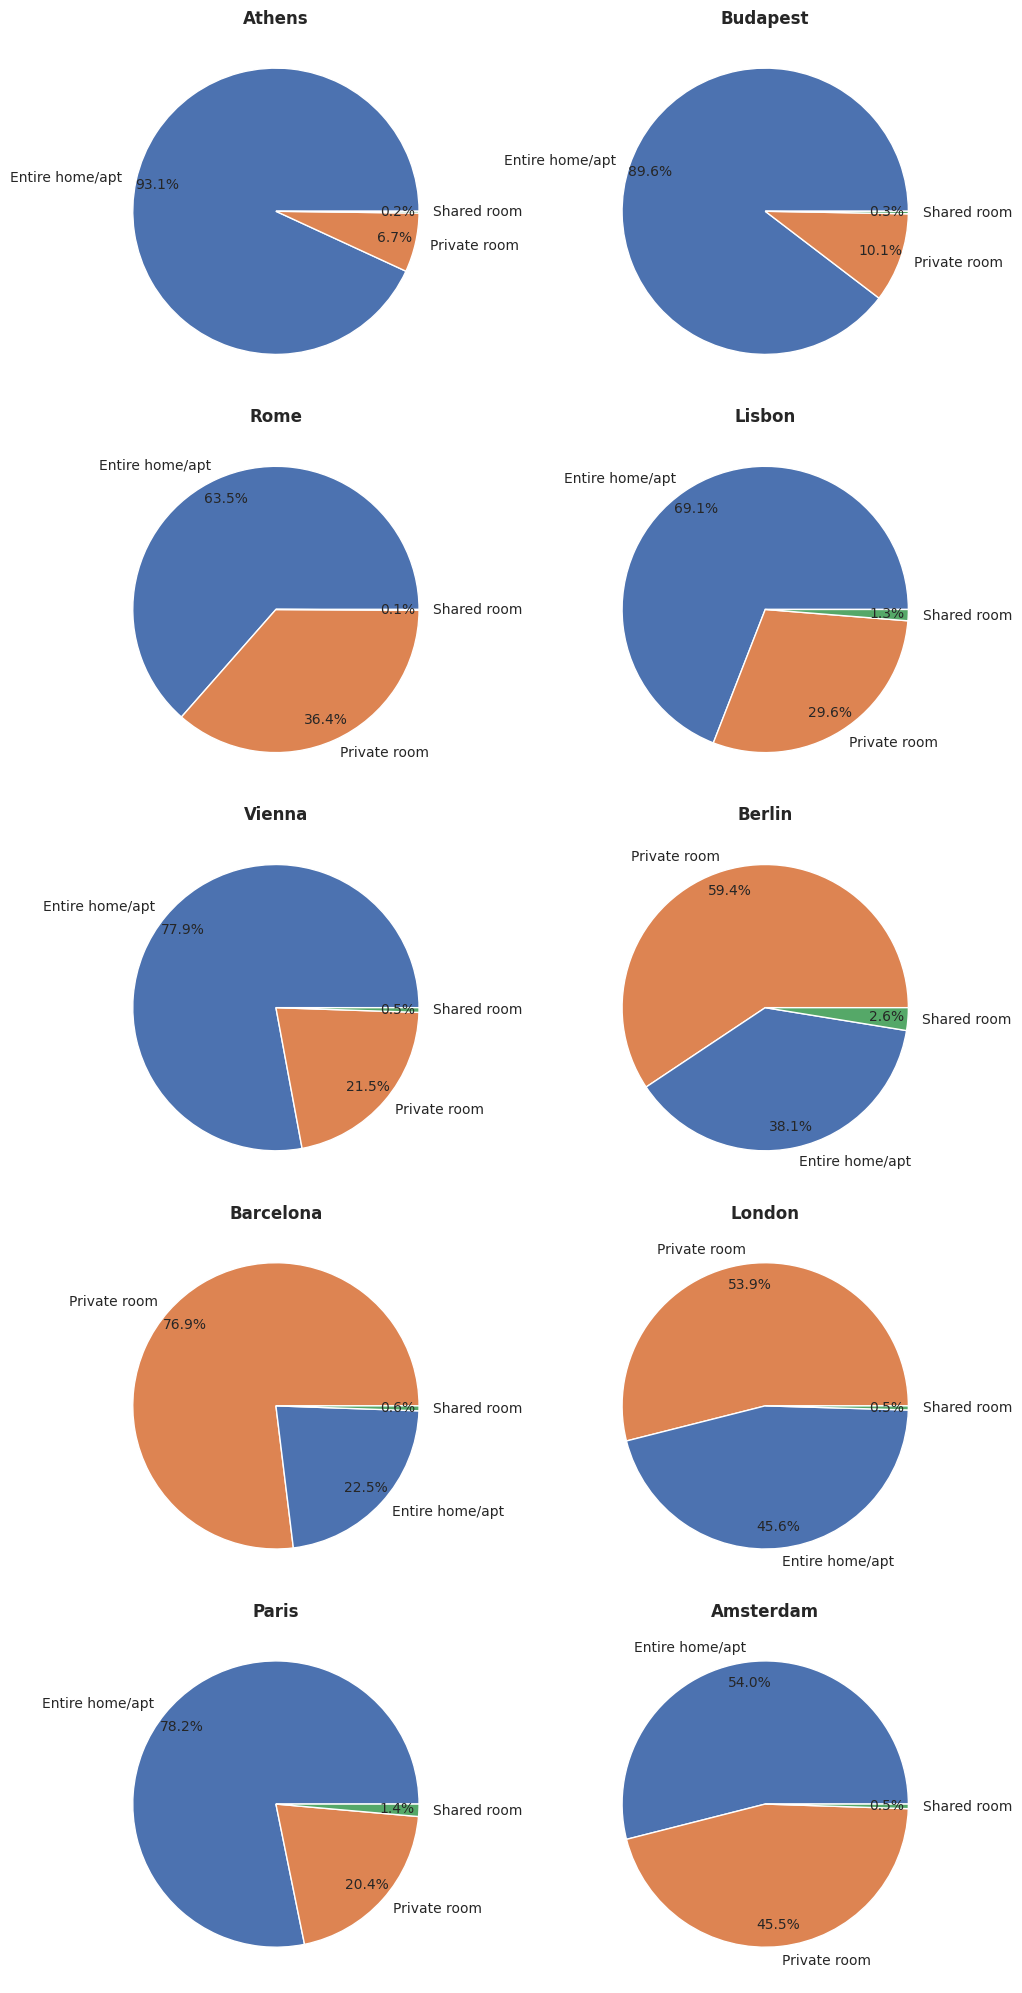

In [29]:
fig = plt.figure(figsize=(10, 40))

for i, city in enumerate(realSum_rank):
  ax = plt.subplot(10, 2, i+1)
  room_type_counts = all_airbnb_prices.query("duplicated == False and city == @city")['room_type'].value_counts()
  room_type_values = room_type_counts.index.tolist()
  room_type_freqs = room_type_counts.values.tolist()
  ax.pie(room_type_freqs, labels=room_type_values, autopct='%2.1f%%', textprops={'size':10}, colors=[room_type_color_dict[room] for room in room_type_values], pctdistance=0.85)
  plt.title(city, fontsize=12, fontweight='bold')
  plt.ylabel(None)

plt.tight_layout()

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Room Types')

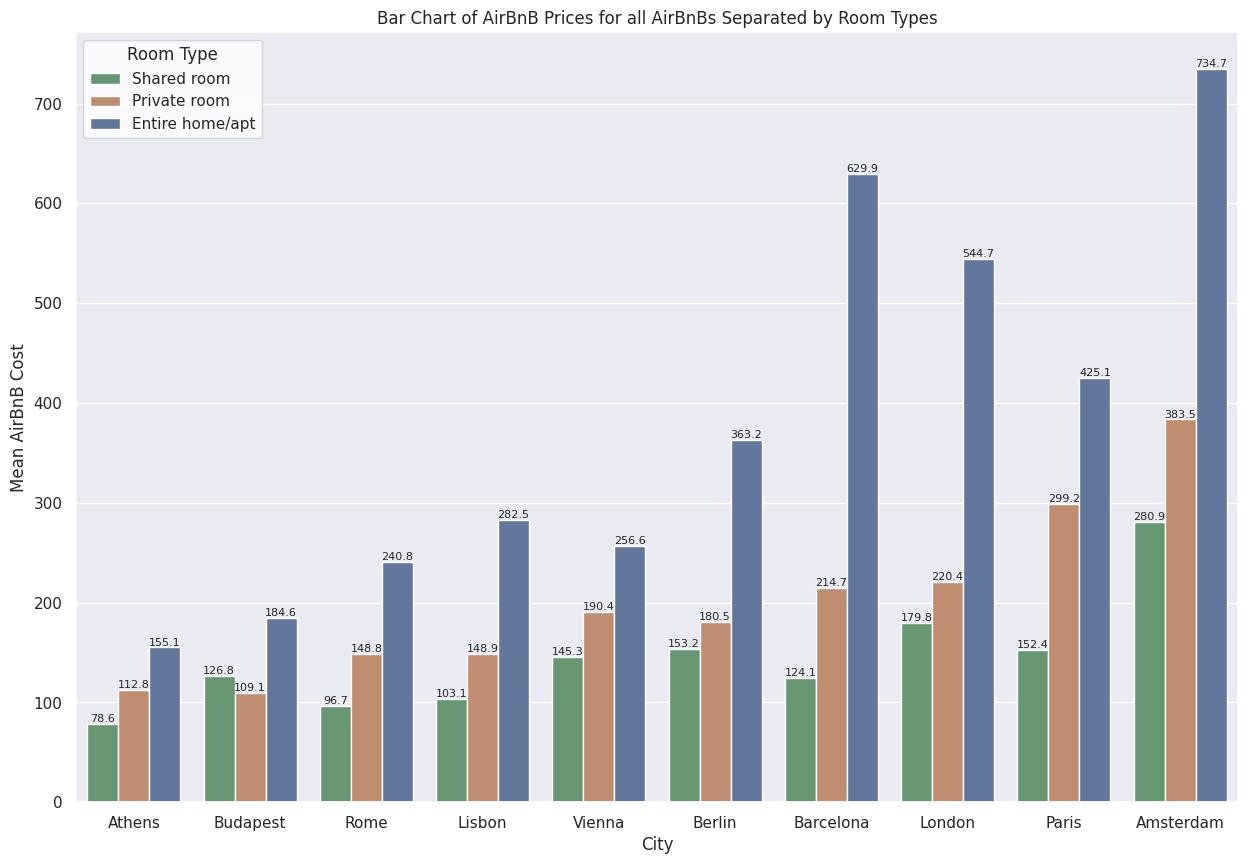

In [30]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="room_type",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=['Shared room', 'Private room', 'Entire home/apt'],
            palette={'Shared room': '#5F9E6E', 'Private room': '#CC8963', 'Entire home/apt': '#5975A4'})
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.1f')
plt.legend(facecolor='white', title='Room Type')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Room Types')

As expected, the price for entire homes and apartments is the highest, followed by private rooms and then shared rooms. Observing the pie charts, we can see a somewhat inverse relationship between the cost of AirBnBs in the city and the percentage of entire homes and apartments in that city. Athens and Budapest have the lowest AirBnB prices but the highest percentage of entire homes and apartments, as compared to more expensive places like London or Barcelona, which have a higher percentage of private rooms. Possible reasons for this trend include AirBnB policies in these cities enforcing certain restrictions on types of AirBnBs that can be rented out, OR lower property prices in cities resulting in the renting out of entire homes and properties being more feasible and vice versa. It could also be a combination of the aforementioned reasons.

Text(0, 0.5, '')

<Figure size 500x500 with 0 Axes>

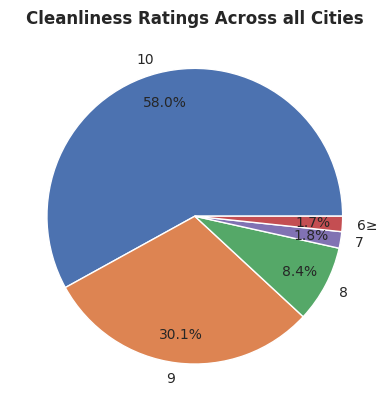

In [31]:
cleanliness_color_dict = {
    '10': '#4C72B0',
    '9': '#DD8452',
    '8': '#55A868',
    '7': '#8172B3',
    '6≥': '#C44E52'
}

plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
cleanliness_counts = all_airbnb_prices.query("duplicated == False")['cleanliness_class'].value_counts()
cleanliness_values = cleanliness_counts.index.tolist()
cleanliness_freqs = cleanliness_counts.values.tolist()
ax.pie(cleanliness_freqs, labels=cleanliness_values, autopct='%2.1f%%', textprops={'size':10}, colors=[cleanliness_color_dict[rating] for rating in cleanliness_values], pctdistance=0.8)
plt.title("Cleanliness Ratings Across all Cities", fontsize=12, fontweight='bold')
plt.ylabel(None)

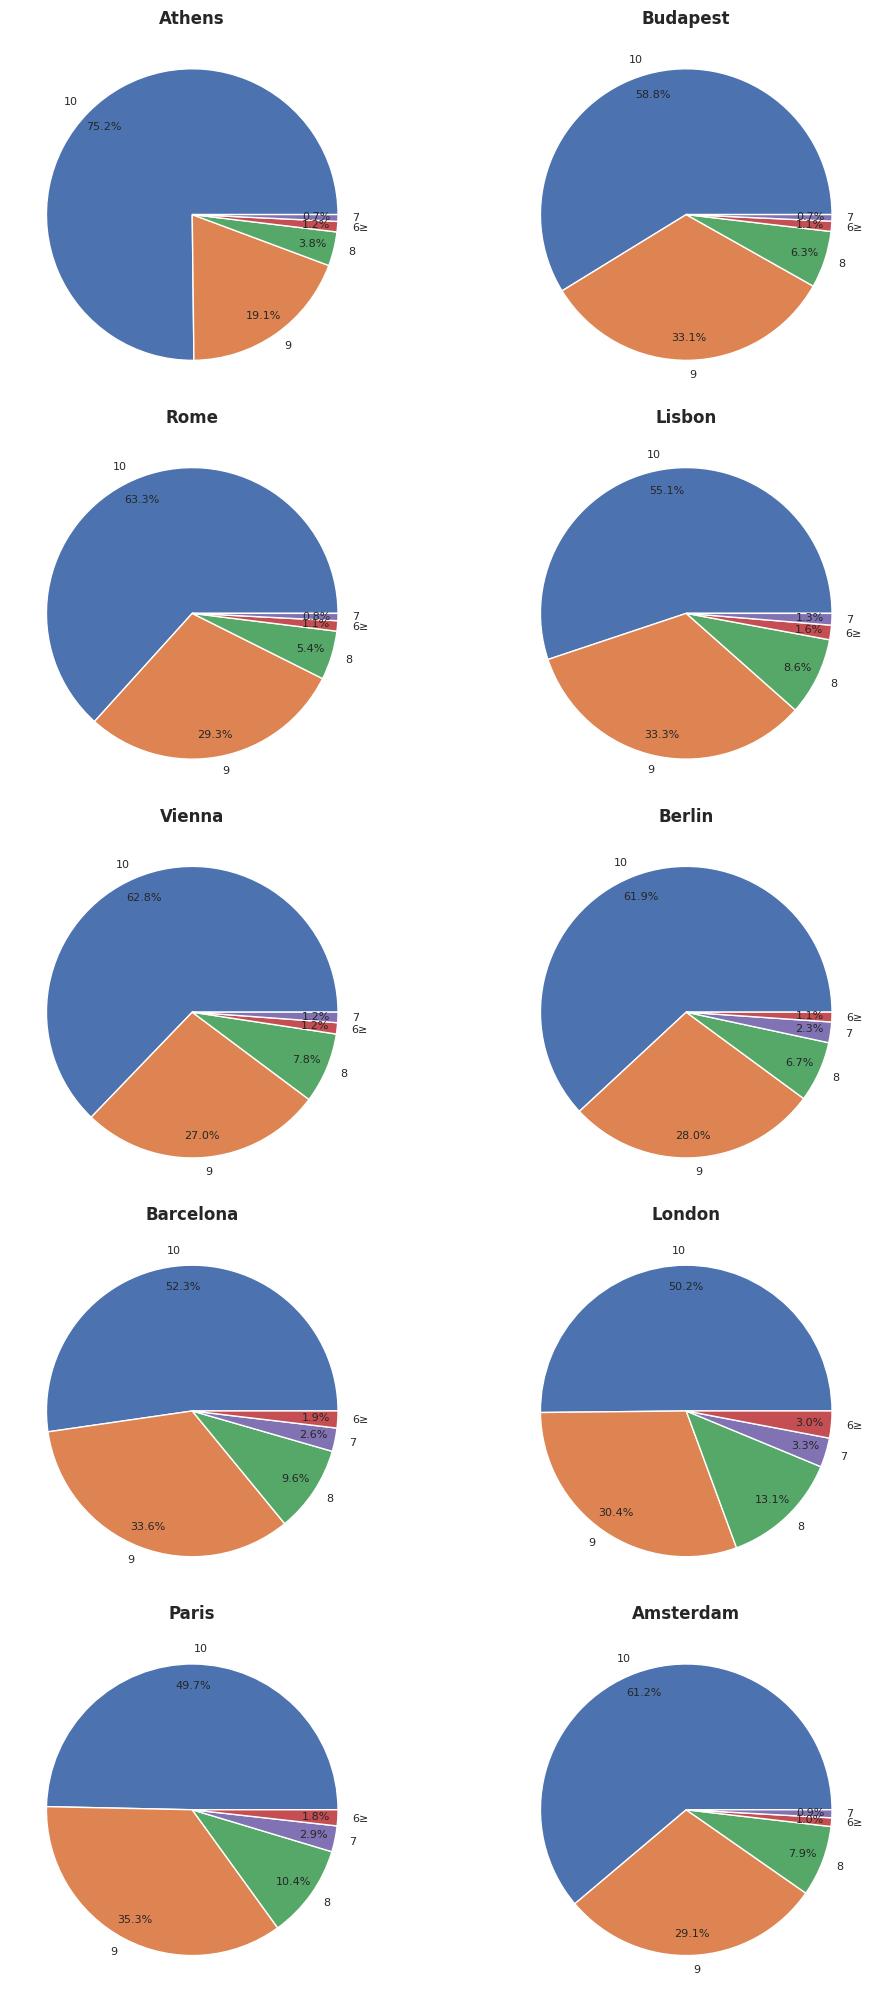

In [32]:
fig = plt.figure(figsize=(10, 40))

for i, city in enumerate(realSum_rank):
  ax = plt.subplot(10, 2, i+1)
  cleanliness_counts = all_airbnb_prices.query("duplicated == False and city == @city")['cleanliness_class'].value_counts()
  cleanliness_values = cleanliness_counts.index.tolist()
  cleanliness_freqs = cleanliness_counts.values.tolist()
  ax.pie(cleanliness_freqs, labels=cleanliness_values, autopct='%2.1f%%', textprops={'size':8}, colors=[cleanliness_color_dict[rating] for rating in cleanliness_values], pctdistance=0.85)
  plt.title(city, fontsize=12, fontweight='bold')
  plt.ylabel(None)

plt.tight_layout()


Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Cleanliness Range')

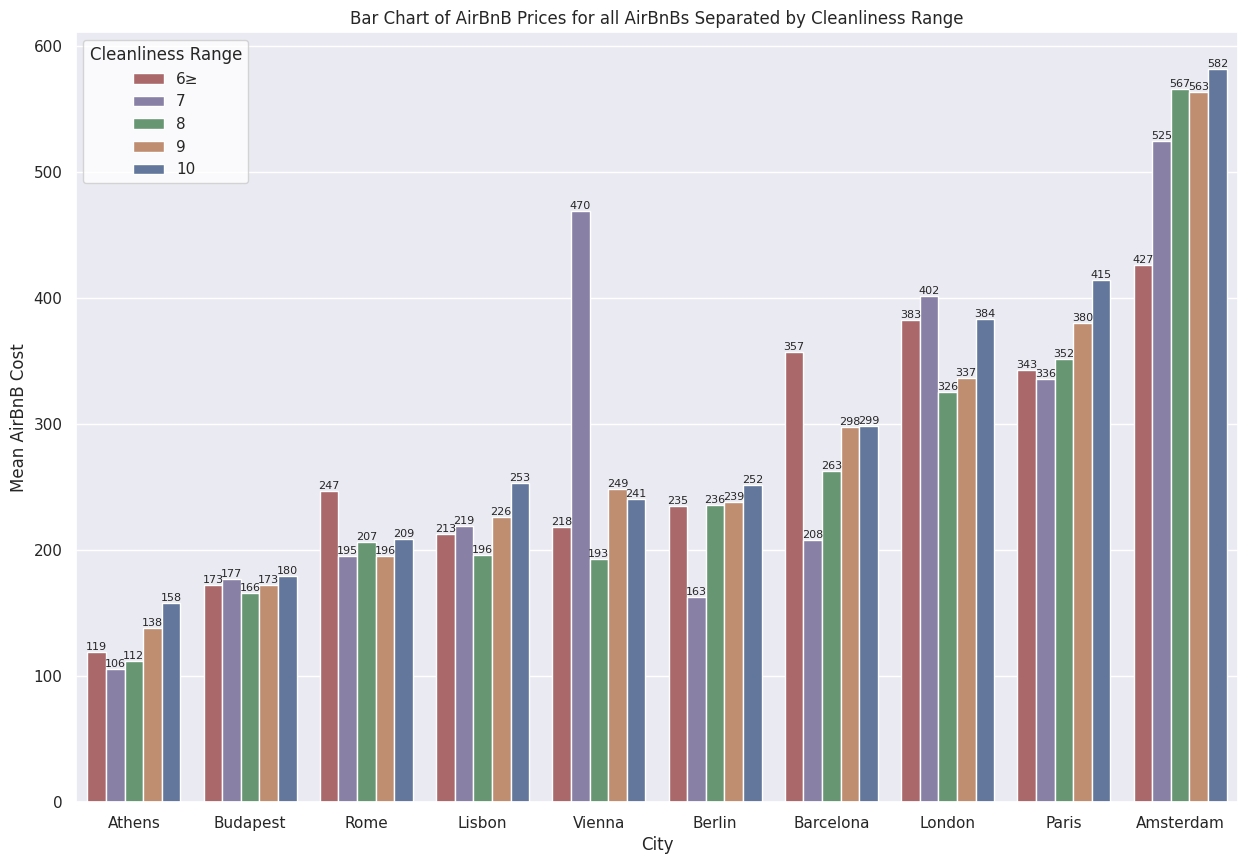

In [33]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="cleanliness_class",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=['6≥', '7', '8', '9', '10'],
            palette={'8': '#5F9E6E', '9': '#CC8963', '10': '#5975A4', '7': '#857AAB', '6≥': '#B55D60'})
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Cleanliness Range')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Cleanliness Range')

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Cleanliness Range Without Outliers')

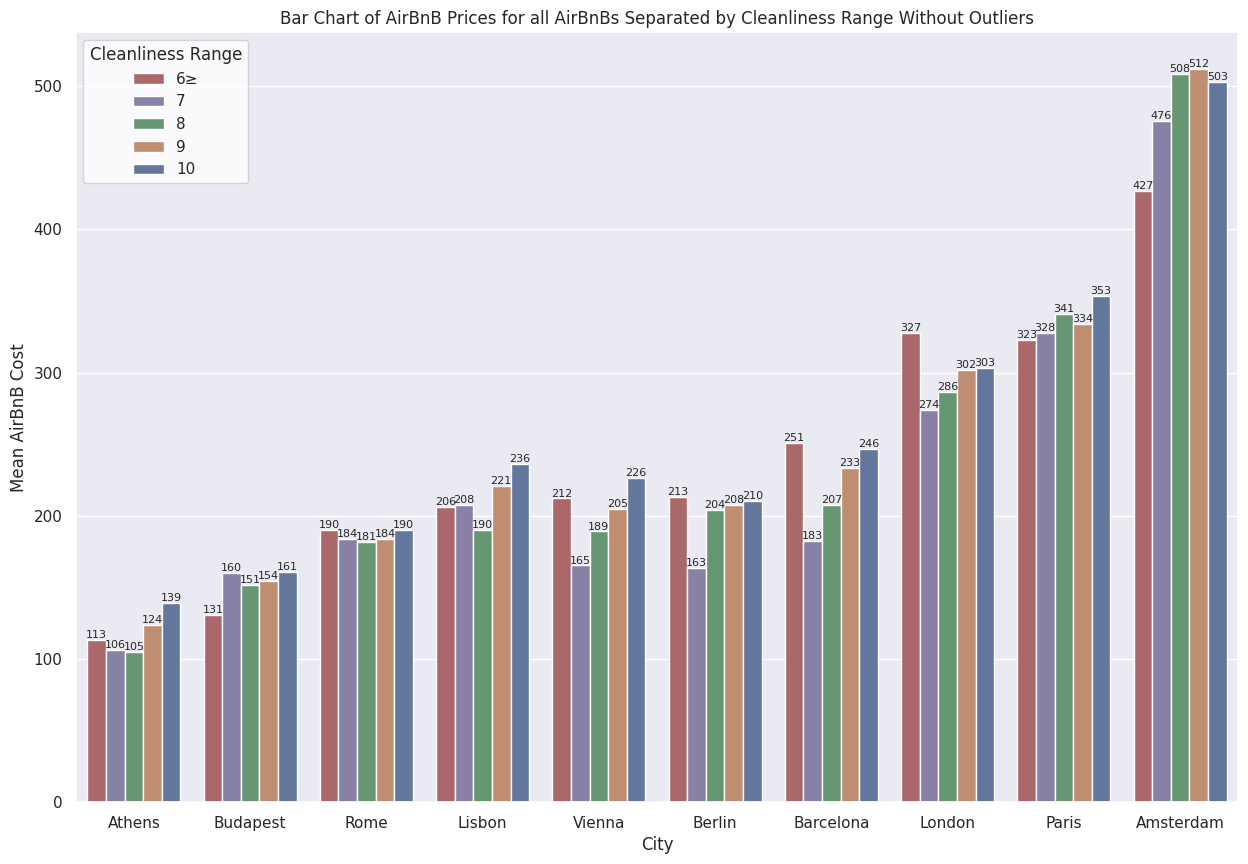

In [34]:
plt.figure(figsize=(15,10))
sns.set_theme()
city_non_outlier = all_airbnb_prices.query('all_outliers == False')['city']
realSum_non_outlier = all_airbnb_prices.query('all_outliers == False')['realSum']
cleanliness_class_non_outlier = all_airbnb_prices.query('all_outliers == False')['cleanliness_class']
bar_plot = sns.barplot(x = city_non_outlier, y = realSum_non_outlier, hue=cleanliness_class_non_outlier,
            estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=['6≥', '7', '8', '9', '10'],
            palette={'8': '#5F9E6E', '9': '#CC8963', '10': '#5975A4', '7': '#857AAB', '6≥': '#B55D60'})
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Cleanliness Range')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Cleanliness Range Without Outliers')

Even after removing outliers, it appears that in many cities, there are AirBnBs with much lower cleanliness ratings that have comparable or even higher prices as compared to those with higher cleanliness ratings, which is not the expected conclusion one would draw. This suggests that cleanliness ratings might not be the best indicator of price by itself. Here are two possible reasons explaining this trend.
  - There are fewer AirBnBs with cleanliness rating 6 and below, resulting in data that is more likely to be skewed
  - AirBnBs with high prices have higher standards, and therefore guests are more likely to nitpick on smaller issues, resulting in lower cleanliness ratings

Text(0, 0.5, '')

<Figure size 700x500 with 0 Axes>

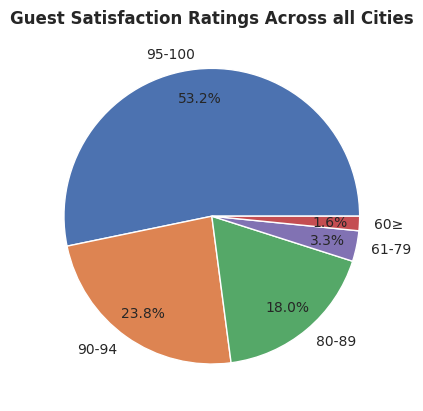

In [35]:
satisfaction_color_dict = {
    '95-100': '#4C72B0',
    '90-94': '#DD8452',
    '80-89': '#55A868',
    '61-79': '#8172B3',
    '60≥': '#C44E52'
}
plt.figure(figsize=(7, 5))

fig, ax = plt.subplots()
satisfaction_counts = all_airbnb_prices.query("duplicated == False")['satisfaction_class'].value_counts()
satisfaction_values = satisfaction_counts.index.tolist()
satisfaction_freqs = satisfaction_counts.values.tolist()
ax.pie(satisfaction_freqs, labels=satisfaction_values, autopct='%2.1f%%', textprops={'size':10}, colors=[satisfaction_color_dict[rating] for rating in satisfaction_values], pctdistance=0.8)
plt.title("Guest Satisfaction Ratings Across all Cities", fontsize=12, fontweight='bold')
plt.ylabel(None)

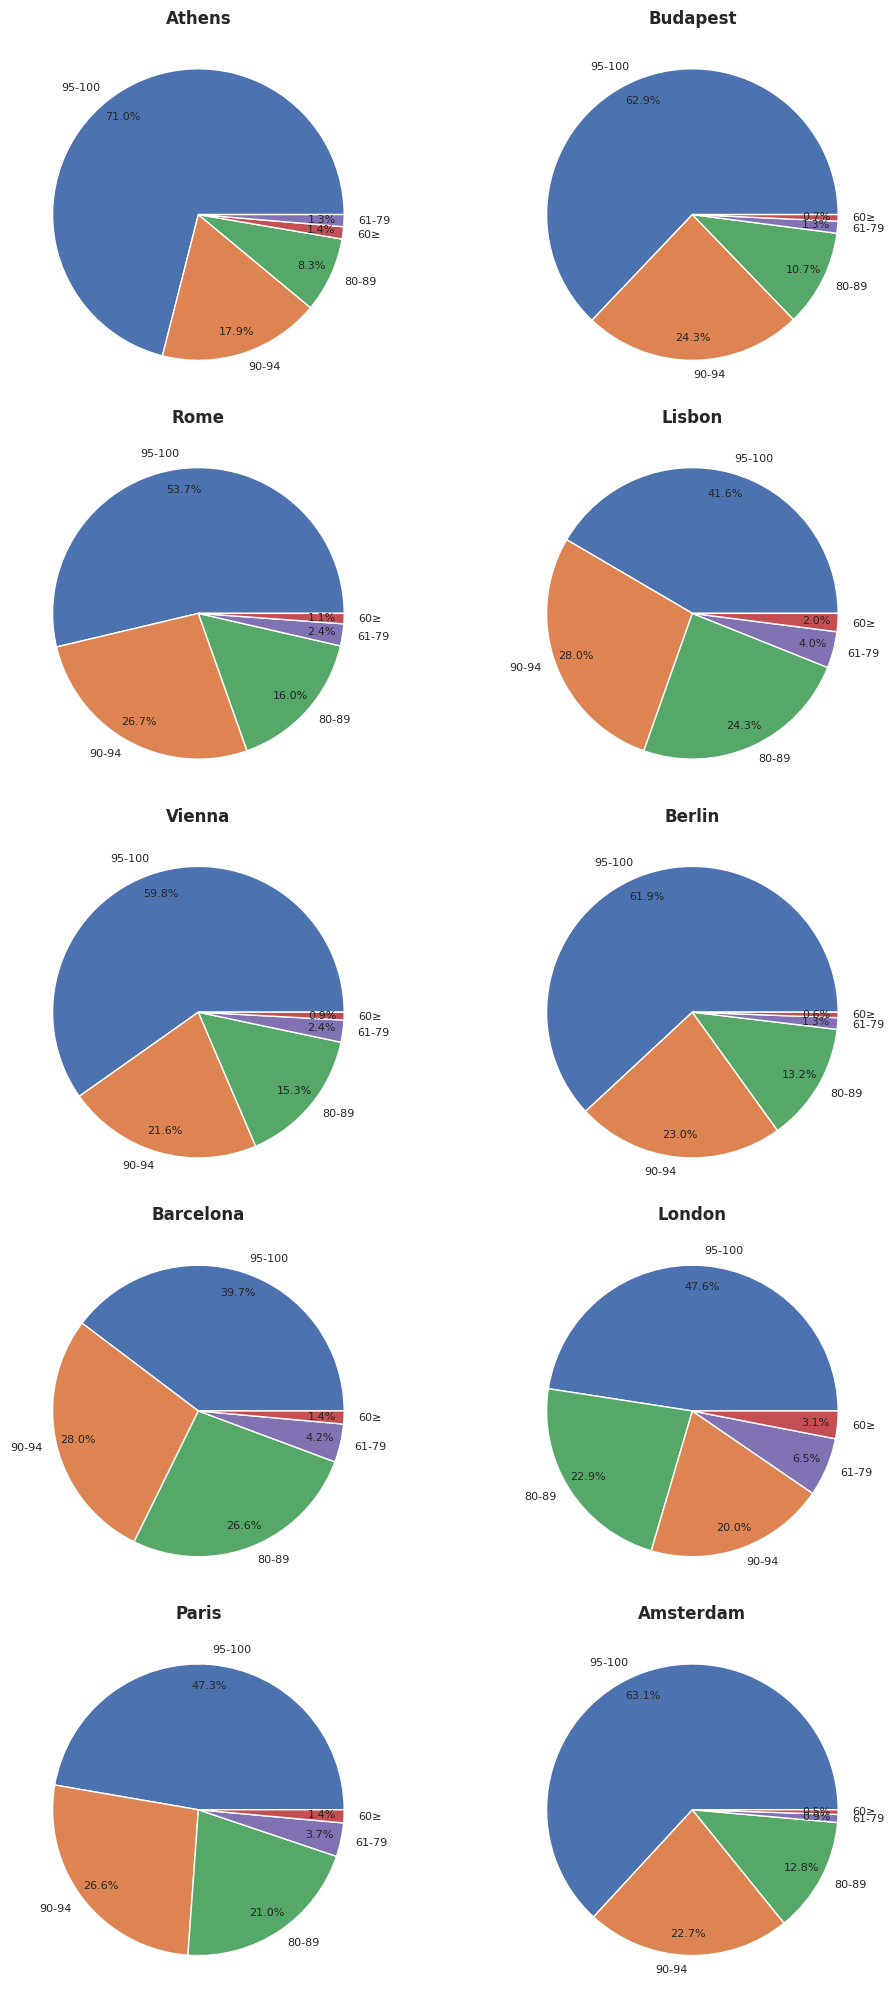

In [36]:
fig = plt.figure(figsize=(10, 40))

for i, city in enumerate(realSum_rank):
  ax = plt.subplot(10, 2, i+1)
  satisfaction_counts = all_airbnb_prices.query("duplicated == False and city == @city")['satisfaction_class'].value_counts()
  satisfaction_values = satisfaction_counts.index.tolist()
  satisfaction_freqs = satisfaction_counts.values.tolist()
  ax.pie(satisfaction_freqs, labels=satisfaction_values, autopct='%2.1f%%', textprops={'size':8}, colors=[satisfaction_color_dict[rating] for rating in satisfaction_values], pctdistance=0.85)
  plt.title(city, fontsize=12, fontweight='bold')
  plt.ylabel(None)

plt.tight_layout()

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Satisfaction Range')

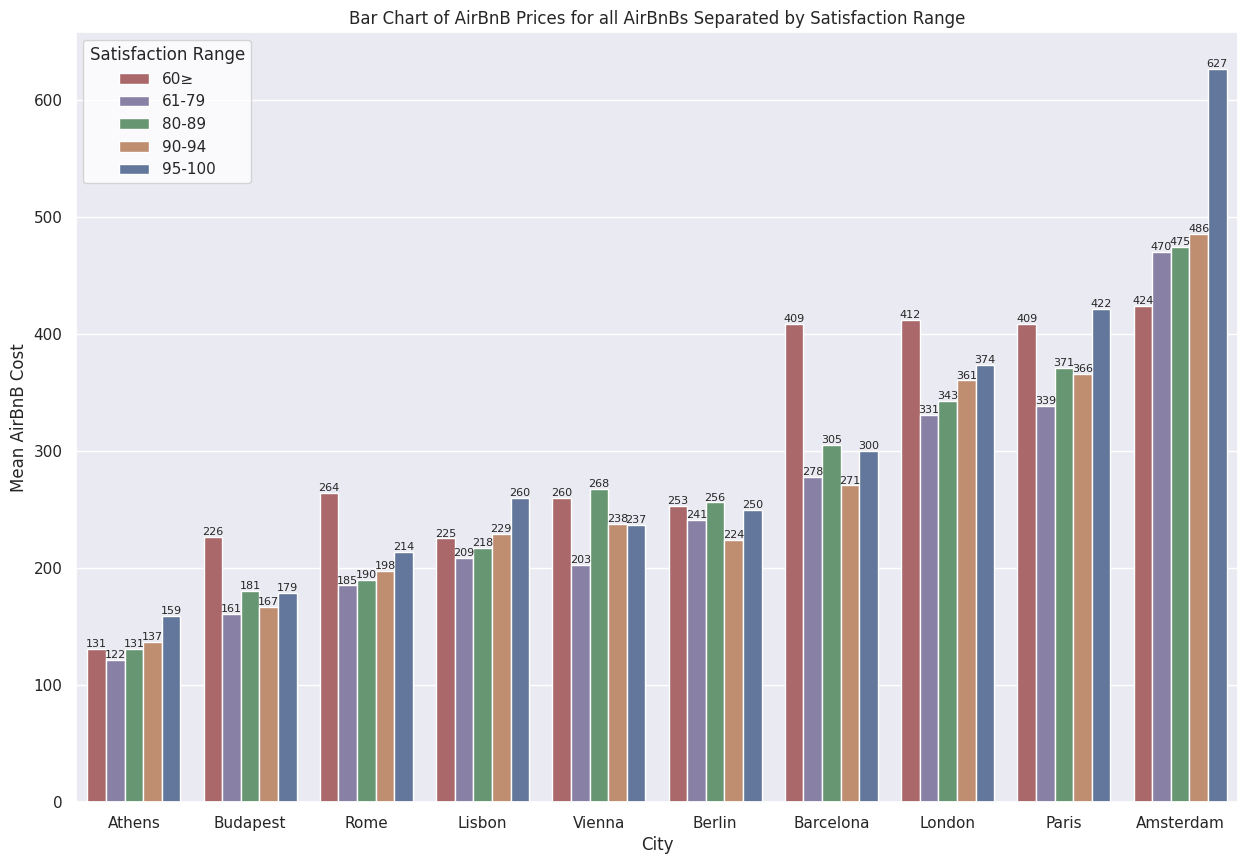

In [37]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="satisfaction_class",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=['60≥', '61-79', '80-89', '90-94', '95-100'],
            palette={'80-89': '#5F9E6E', '90-94': '#CC8963', '95-100': '#5975A4', '61-79': '#857AAB', '60≥': '#B55D60'})
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Satisfaction Range')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Satisfaction Range')

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Satisfaction Range Without Outliers')

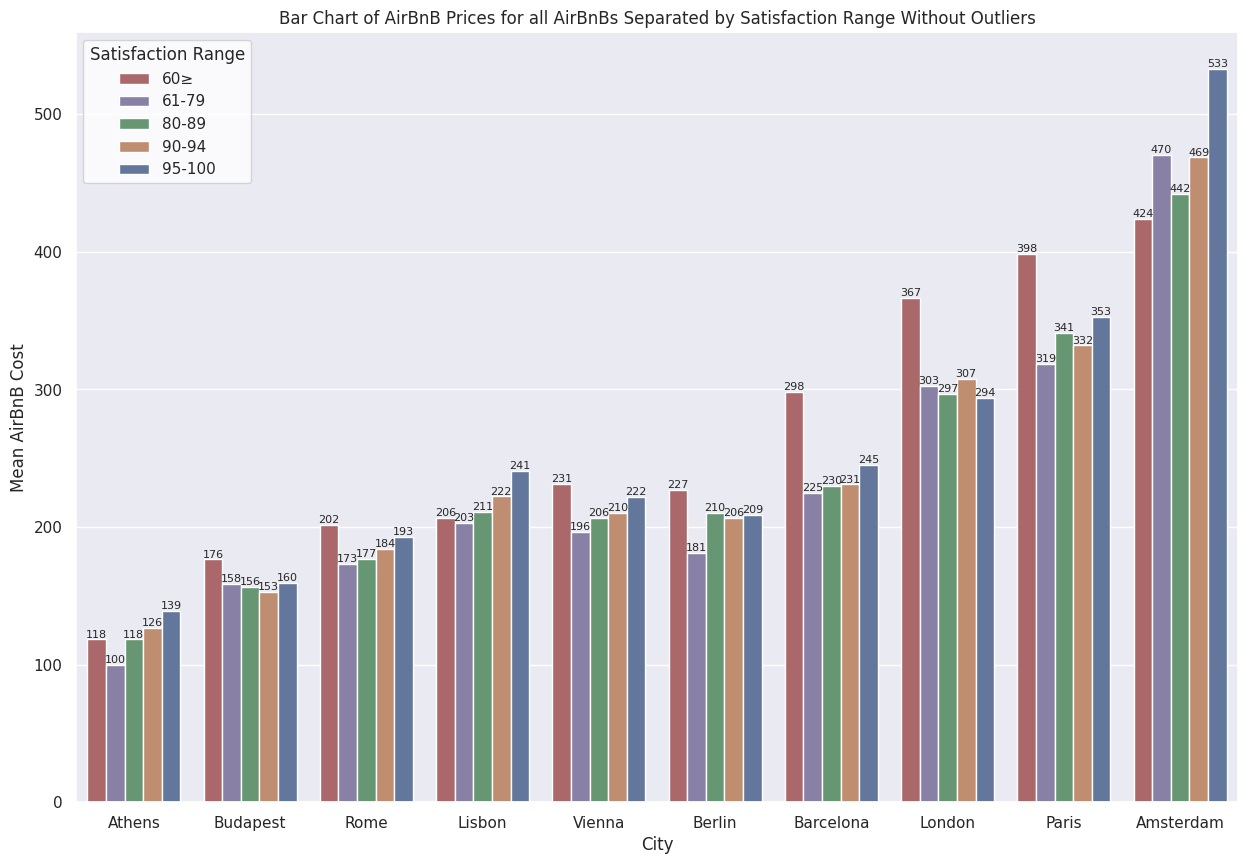

In [38]:
plt.figure(figsize=(15,10))
sns.set_theme()
satisfaction_class_non_outlier = all_airbnb_prices.query('all_outliers == False')['satisfaction_class']
bar_plot = sns.barplot(x = city_non_outlier, y = realSum_non_outlier, hue=satisfaction_class_non_outlier,
            estimator="mean", errorbar=None, order=realSum_rank,
            hue_order=['60≥', '61-79', '80-89', '90-94', '95-100'],
            palette={'80-89': '#5F9E6E', '90-94': '#CC8963', '95-100': '#5975A4', '61-79': '#857AAB', '60≥': '#B55D60'})
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Satisfaction Range')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Satisfaction Range Without Outliers')

Even after removing outliers, it appears that in many cities, there are AirBnBs with much lower satisfaction ratings that have comparable or even higher prices as compared to those with higher satisfaction ratings, which is not the expected conclusion one would draw. This is actually very similar to the observation for cleanliness ratings. It once again suggests that satisfaction ratings might not be the best indicator of price by itself. The reasons explaining this trend are likely to be similar to those for the cleanliness ratings.
  - There are fewer AirBnBs with satisfaction rating 60 and below, resulting in data that is more likely to be skewed (However, the fact that prices for satisfaction ratings in this range for every single city bar Amsterdam is higher than the rest suggests that this might not be the case)
  - AirBnBs with high prices have higher standards, and therefore guests are more likely to nitpick and penalize on smaller issues, resulting in lower satisfaction ratings

Text(0, 0.5, '')

<Figure size 700x500 with 0 Axes>

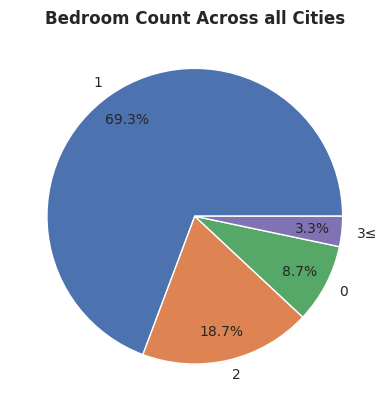

In [39]:
bedroom_color_dict = {
    '1': '#4C72B0',
    '2': '#DD8452',
    '0': '#55A868',
    '3≤': '#8172B3',
}

plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()
bedroom_counts = all_airbnb_prices.query("duplicated == False")['bedroom_class'].value_counts()
bedroom_values = bedroom_counts.index.tolist()
bedroom_freqs = bedroom_counts.values.tolist()
ax.pie(bedroom_freqs, labels=bedroom_values, autopct='%2.1f%%', textprops={'size':10}, colors=[bedroom_color_dict[bedroom_num] for bedroom_num in bedroom_values], pctdistance=0.8)
plt.title("Bedroom Count Across all Cities", fontsize=12, fontweight='bold')
plt.ylabel(None)

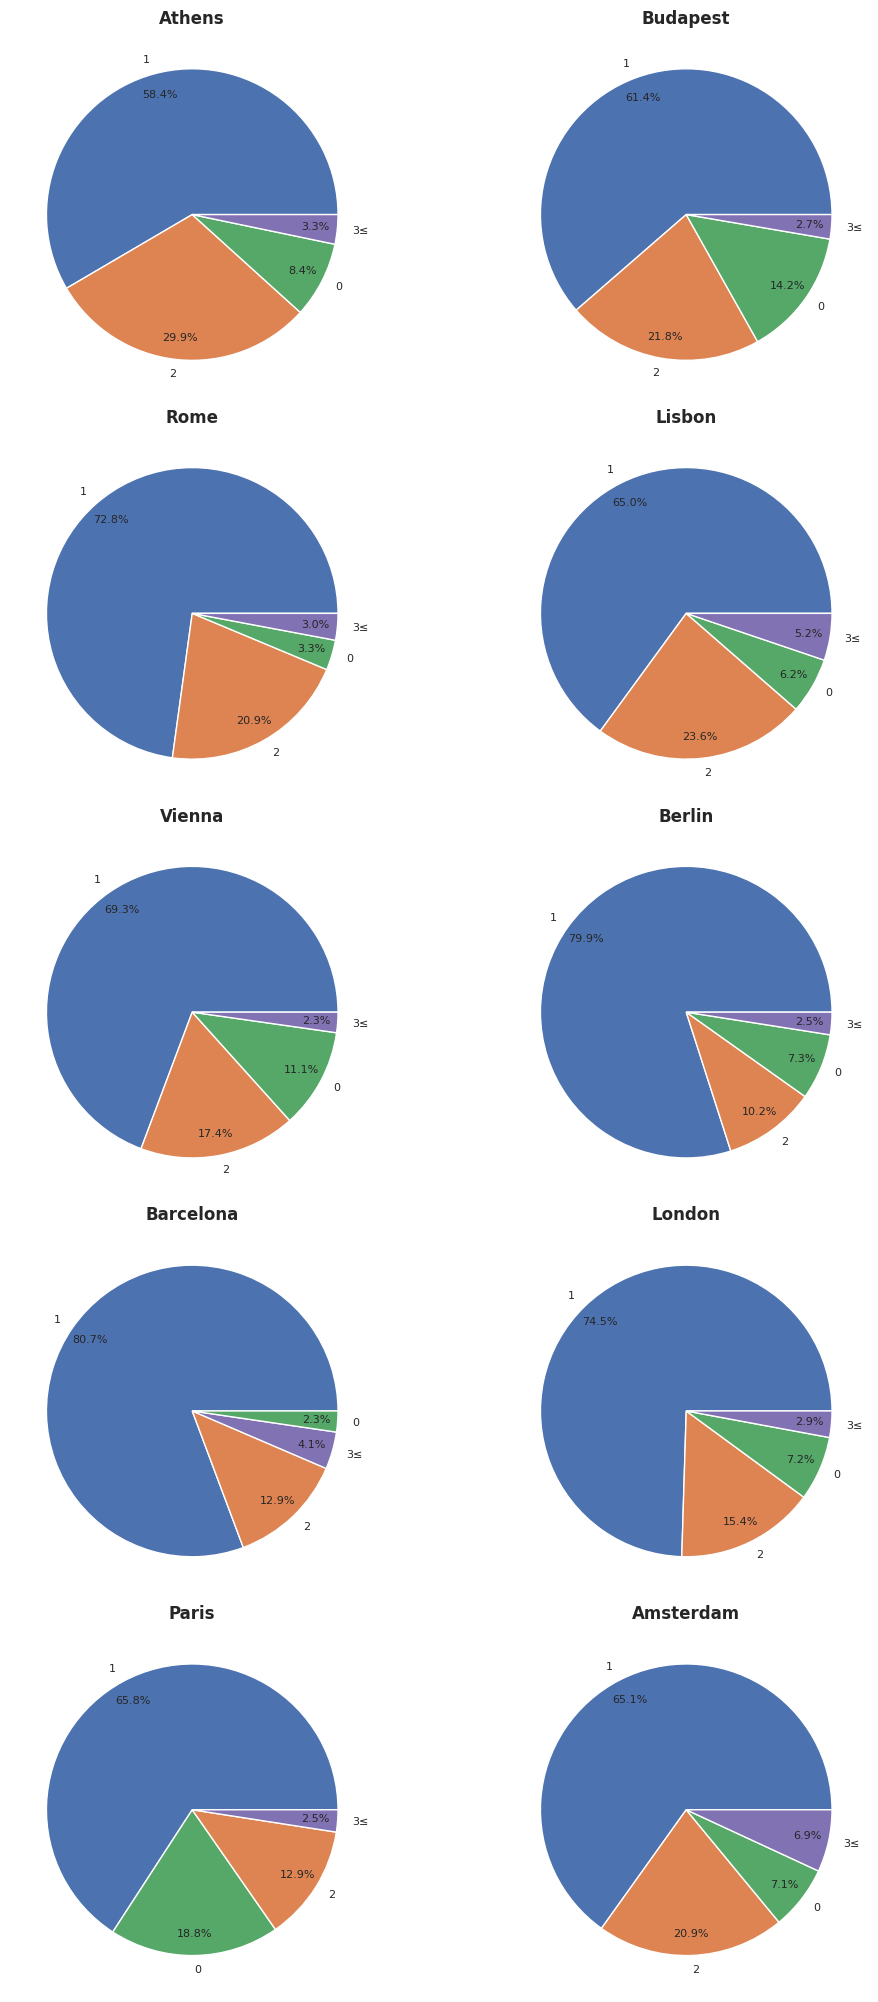

In [40]:
fig = plt.figure(figsize=(10, 40))

for i, city in enumerate(realSum_rank):
  ax = plt.subplot(10, 2, i+1)
  bedroom_counts = all_airbnb_prices.query("duplicated == False and city == @city")['bedroom_class'].value_counts()
  bedroom_values = bedroom_counts.index.tolist()
  bedroom_freqs = bedroom_counts.values.tolist()
  ax.pie(bedroom_freqs, labels=bedroom_values, autopct='%2.1f%%', textprops={'size':8}, colors=[bedroom_color_dict[rating] for rating in bedroom_values], pctdistance=0.85)
  plt.title(city, fontsize=12, fontweight='bold')
  plt.ylabel(None)

plt.tight_layout()

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Number of Bedrooms')

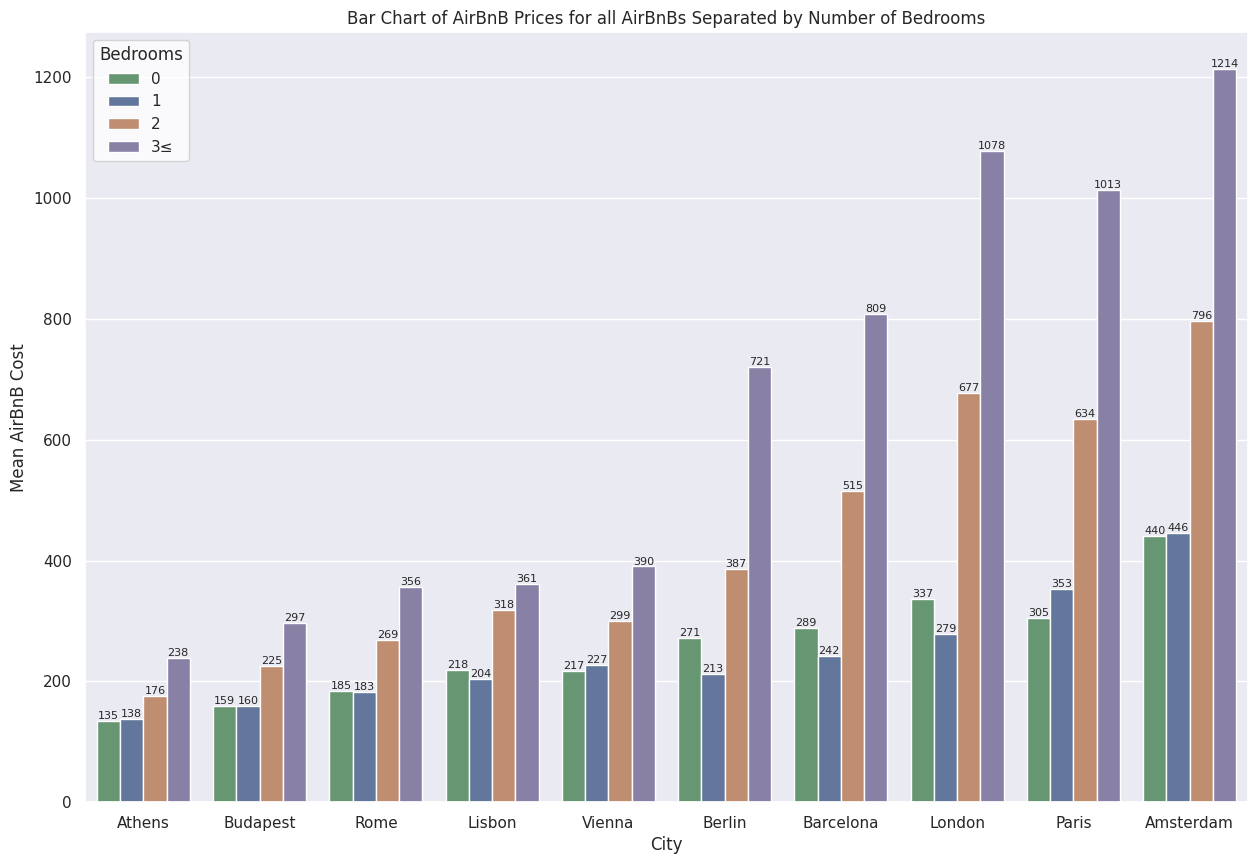

In [41]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="bedroom_class",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=['0', '1', '2', '3≤'],
            palette={'0': '#5F9E6E', '2': '#CC8963', '1': '#5975A4', '3≤': '#857AAB'})
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Bedrooms')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Number of Bedrooms')

The price of an AirBnB generally increases with the number of rooms, as expected. All the cities have a majority of 1 bedroom rentals. Of note, most of the AirBnBs with 3 or more rooms across the cities would be considered outliers. Therefore, with certain extreme exceptions, outliers should be strongly considered for use in the prediction process.

Text(0, 0.5, '')

<Figure size 700x500 with 0 Axes>

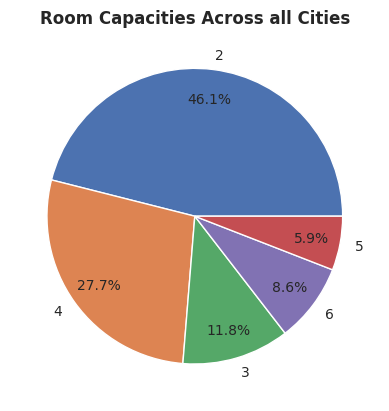

In [42]:
room_capacity_color_dict = {
    2: '#4C72B0',
    4: '#DD8452',
    3: '#55A868',
    6: '#8172B3',
    5: '#C44E52'
}

plt.figure(figsize=(7, 5))

fig, ax = plt.subplots()
room_capacity_counts = all_airbnb_prices.query("duplicated == False")['person_capacity_class'].value_counts()
room_capacity_values = room_capacity_counts.index.tolist()
room_capacity_freqs = room_capacity_counts.values.tolist()
ax.pie(room_capacity_freqs, labels=room_capacity_values, autopct='%2.1f%%', textprops={'size':10}, colors=[room_capacity_color_dict[capacity] for capacity in room_capacity_values], pctdistance=0.8)
plt.title("Room Capacities Across all Cities", fontsize=12, fontweight='bold')
plt.ylabel(None)

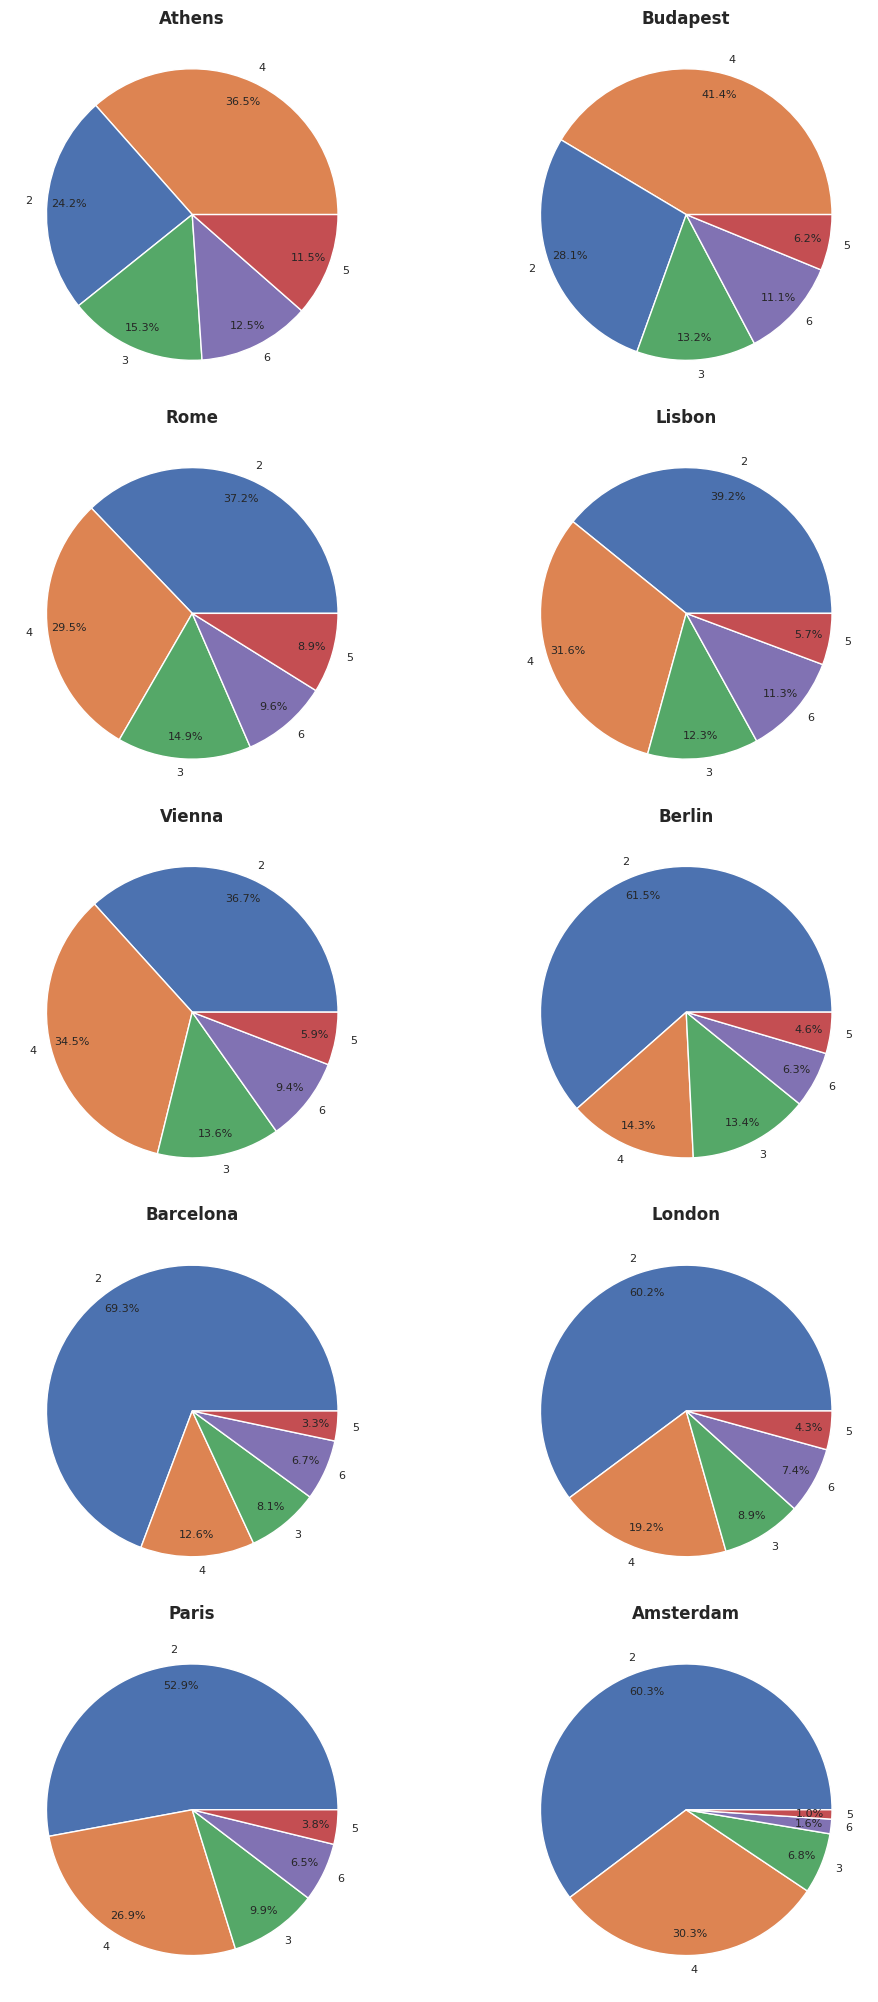

In [43]:
fig = plt.figure(figsize=(10, 40))

for i, city in enumerate(realSum_rank):
  ax = plt.subplot(10, 2, i+1)
  room_capacity_counts = all_airbnb_prices.query("duplicated == False and city == @city")['person_capacity_class'].value_counts()
  room_capacity_values = room_capacity_counts.index.tolist()
  room_capacity_freqs = room_capacity_counts.values.tolist()
  ax.pie(room_capacity_freqs, labels=room_capacity_values, autopct='%2.1f%%', textprops={'size':8}, colors=[room_capacity_color_dict[capacity] for capacity in room_capacity_values], pctdistance=0.85)
  plt.title(city, fontsize=12, fontweight='bold')
  plt.ylabel(None)

plt.tight_layout()

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Room Capacity')

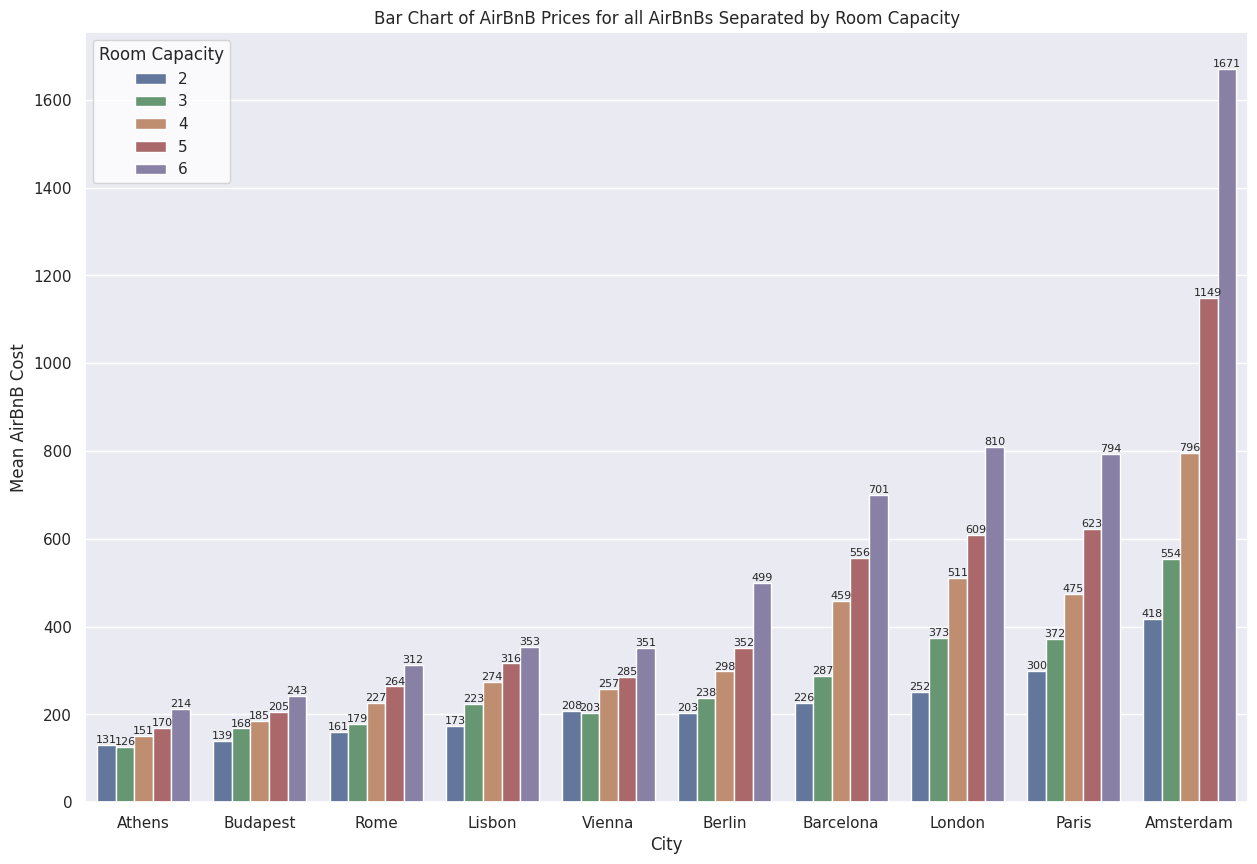

In [44]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="person_capacity_class",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=[2, 3, 4, 5, 6],
            palette={3: '#5F9E6E', 4: '#CC8963', 2: '#5975A4', 6: '#857AAB', 5: '#B55D60'})
plt.rcParams['font.size'] = 8
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Room Capacity')
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Room Capacity')

The price of an AirBnB generally increases with the capacity of the rental, as expected. Also, the percentage of AirBnB's in a city with higher capacity (particularly 4 and above) does correlate with a higher percentage of entire homes and apartments. Bigger place &rarr; More space &rarr; More people can stay. However, there isn't a strong correlation between the capacity and rooms of the AirBnBs.

In [45]:
listing_by_city = all_airbnb_prices.query("duplicated == False").groupby('city').realSum.count().reset_index()
superhosts_by_city = all_airbnb_prices.query("duplicated == False").groupby('city').host_is_superhost.sum().reset_index()
multi_by_city = all_airbnb_prices.query("duplicated == False").groupby('city').multi.sum().reset_index()
biz_by_city = all_airbnb_prices.query("duplicated == False").groupby('city').biz.sum().reset_index()

all_listing_comparisons_by_city = listing_by_city.merge(superhosts_by_city)
all_listing_comparisons_by_city = all_listing_comparisons_by_city.merge(multi_by_city)
all_listing_comparisons_by_city = all_listing_comparisons_by_city.merge(biz_by_city)

all_listing_comparisons_by_city['superhost_percentage(%)'] = round(all_listing_comparisons_by_city['host_is_superhost']/all_listing_comparisons_by_city['realSum'] * 100, 1)
all_listing_comparisons_by_city['multi_percentage(%)'] = round(all_listing_comparisons_by_city['multi']/all_listing_comparisons_by_city['realSum'] * 100, 1)
all_listing_comparisons_by_city['biz_percentage(%)'] = round(all_listing_comparisons_by_city['biz']/all_listing_comparisons_by_city['realSum'] * 100, 1)
all_listing_comparisons_by_city['city'] = pd.Categorical(all_listing_comparisons_by_city['city'], categories=realSum_rank, ordered=True)
all_listing_comparisons_by_city = all_listing_comparisons_by_city.sort_values(by='city')

non_duplicated_listings = all_airbnb_prices.query("duplicated == False").shape[0]
total_superhosts = all_listing_comparisons_by_city['host_is_superhost'].sum()
total_multi = all_listing_comparisons_by_city['multi'].sum()
total_biz = all_listing_comparisons_by_city['biz'].sum()
total_superhosts_perc = round(total_superhosts/non_duplicated_listings * 100, 1)
total_multi_perc = round(total_multi/non_duplicated_listings * 100, 1)
total_biz_perc = round(total_biz/non_duplicated_listings * 100, 1)

average_row = pd.Series({'city': 'Average',
               'realSum': non_duplicated_listings,
               'host_is_superhost': total_superhosts,
               'multi': total_multi,
               'biz': total_biz,
               'superhost_percentage(%)': total_superhosts_perc,
               'multi_percentage(%)': total_multi_perc,
               'biz_percentage(%)': total_biz_perc})

all_listing_comparisons_by_city = pd.concat([all_listing_comparisons_by_city, average_row.to_frame().transpose()], ignore_index=True)

all_listing_comparisons_by_city

city realSum host_is_superhost multi    biz superhost_percentage(%)  \
0      Athens    2938              1280   808   1066                    43.6   
1    Budapest    2486               917   765    843                    36.9   
2        Rome    4968              1667  1950   1545                    33.6   
3      Lisbon    3171               689   793   1783                    21.7   
4      Vienna    2084               602   591    682                    28.9   
5      Berlin    1486               399   411    239                    26.9   
6   Barcelona    1813               340   680    607                    18.8   
7      London    5858               958  1600   2300                    16.4   
8       Paris    3959               582   878    890                    14.7   
9   Amsterdam    1362               402   386    139                    29.5   
10    Average   30125              7836  8862  10094                    26.0   

   multi_percentage(%) biz_percentage(%)  
0                 27.5              36.3  
1                 30.8              33.9  
2                 39.3              31.1  
3                 25.0              56.2  
4                 28.4              32.7  
5                 27.7              16.1  
6                 37.5              33.5  
7                 27.3              39.3  
8                 22.2              22.5  
9                 28.3              10.2  
10                29.4              33.5

Text(0.5, 1.0, 'Bar Chart of Percentage of Superhosts')

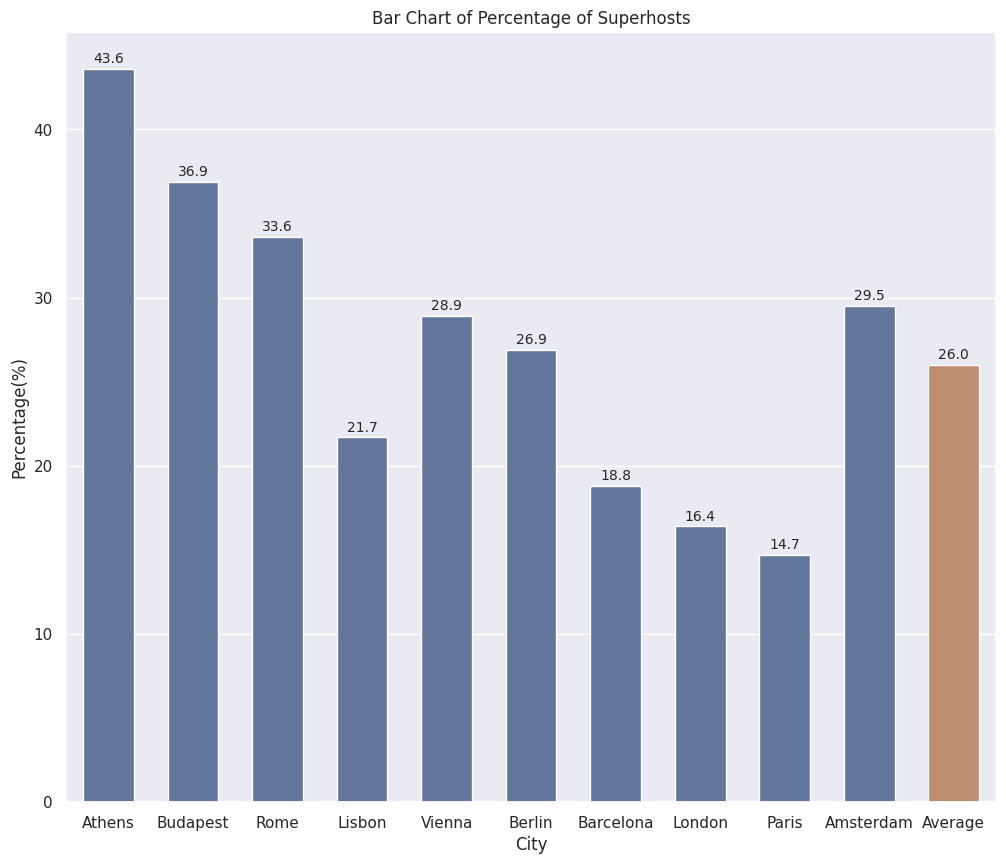

In [46]:
plt.figure(figsize=(12, 10))
sns.set_theme()
bar_plot = sns.barplot(x='city', y='superhost_percentage(%)', data=all_listing_comparisons_by_city,
            palette=color_palette, width=0.6)
plt.rcParams['font.size'] = 10
bar_plot.bar_label(bar_plot.containers[0], fmt='%.1f', padding=2)
plt.xlabel('City')
plt.ylabel('Percentage(%)')
plt.title('Bar Chart of Percentage of Superhosts')

The percentage of superhosts is much higher than average in Athens, and much lower than average in London and Paris.

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Whether Host is Superhost or Not')

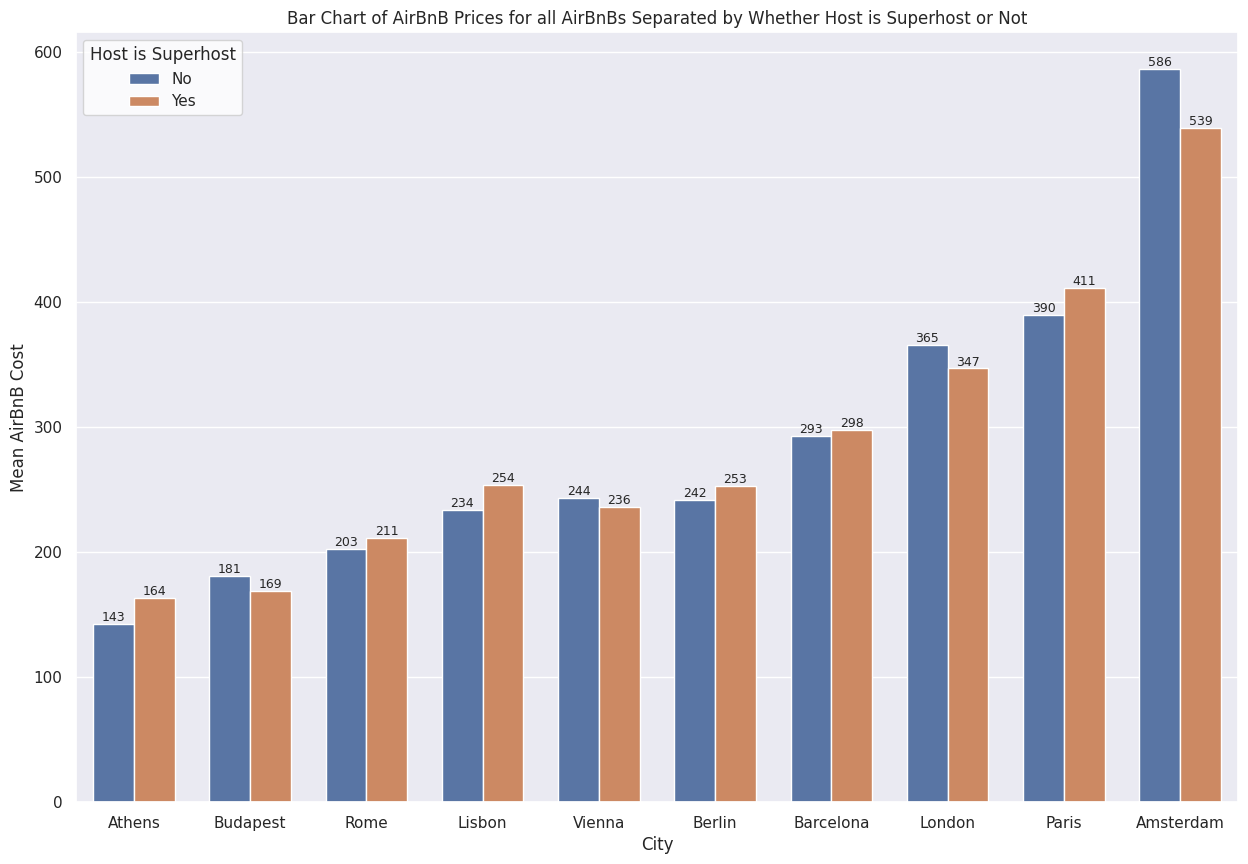

In [47]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="host_is_superhost",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=[0, 1], width=0.7)
plt.rcParams['font.size'] = 9
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Host is Superhost', labels=['No', 'Yes'])
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Whether Host is Superhost or Not')

There is no clear trend between AirBnB price and whether the host is a superhost or not.

Text(0.5, 1.0, 'Bar Chart of Percentage of Multiple Room Listings')

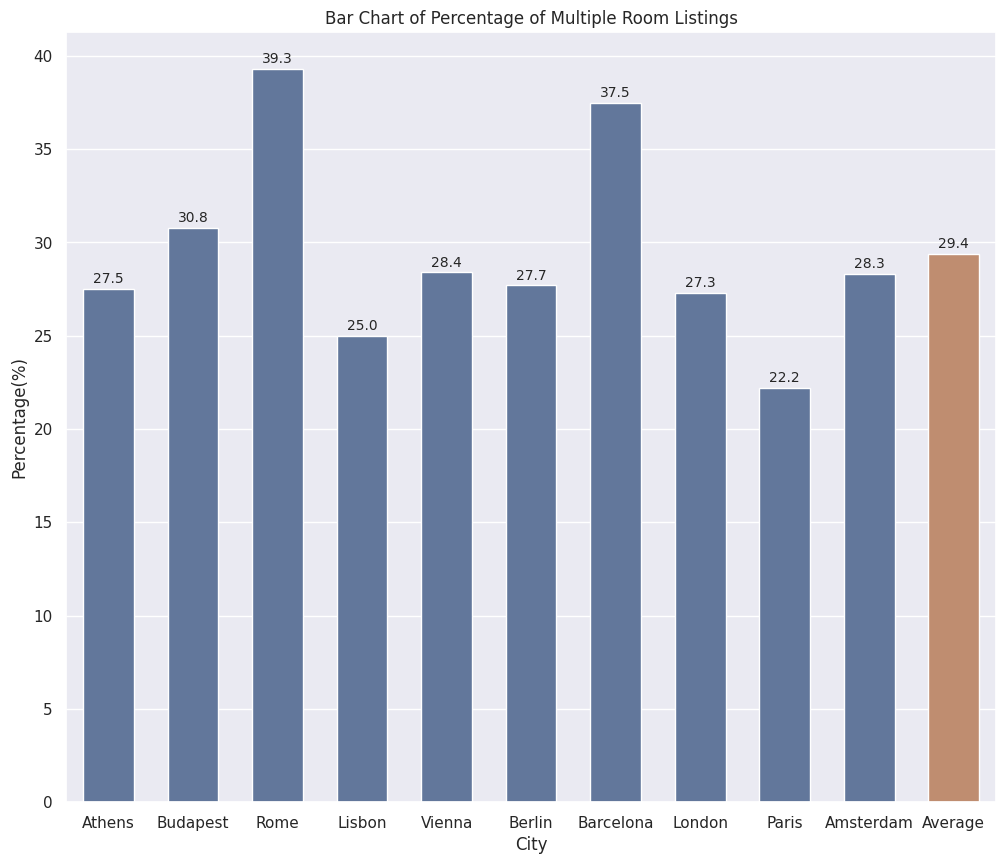

In [48]:
plt.figure(figsize=(12, 10))
sns.set_theme()
bar_plot = sns.barplot(x='city', y='multi_percentage(%)', data=all_listing_comparisons_by_city,
            palette=color_palette, width=0.6)
plt.rcParams['font.size'] = 10
bar_plot.bar_label(bar_plot.containers[0], fmt='%.1f', padding=2)
plt.xlabel('City')
plt.ylabel('Percentage(%)')
plt.title('Bar Chart of Percentage of Multiple Room Listings')

The percentages of multiple room listings are more or less consistent throughout the cities, with an average of 29.4% of listings being multiple room listings.

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Whether Listing is for Multiple Rooms or Not')

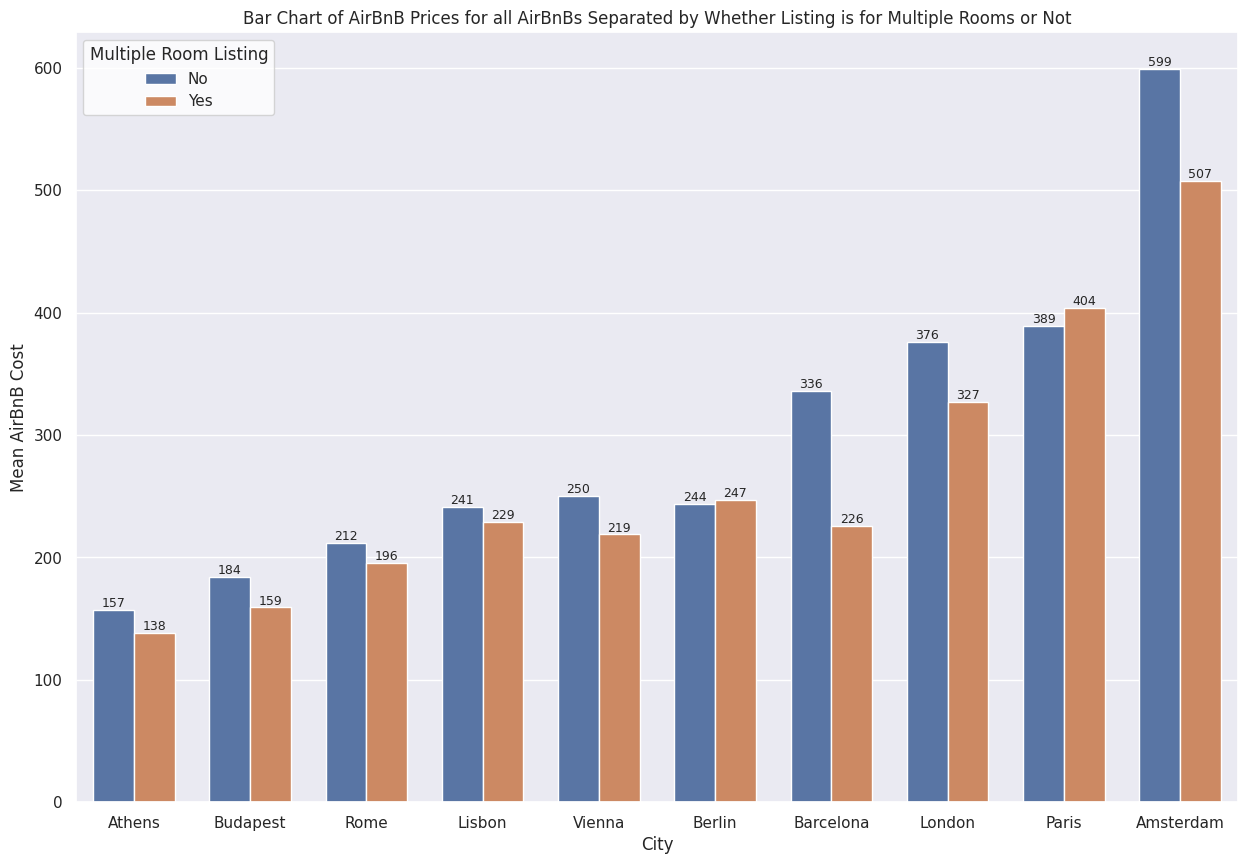

In [49]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="multi",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=[0, 1], width=0.7)
plt.rcParams['font.size'] = 9
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Multiple Room Listing', labels=['No', 'Yes'])
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Whether Listing is for Multiple Rooms or Not')

Across the cities, multiple room listings are generally cheaper than non-multiple room listings, as expected. (Multiple room listings are for listings containing multiple rooms in the same location, suggesting that these listings have shared facilities with other renters. One would infer that such listings are more likely to be cheaper)

Text(0.5, 1.0, 'Bar Chart of Percentage of Listings for Business Purposes')

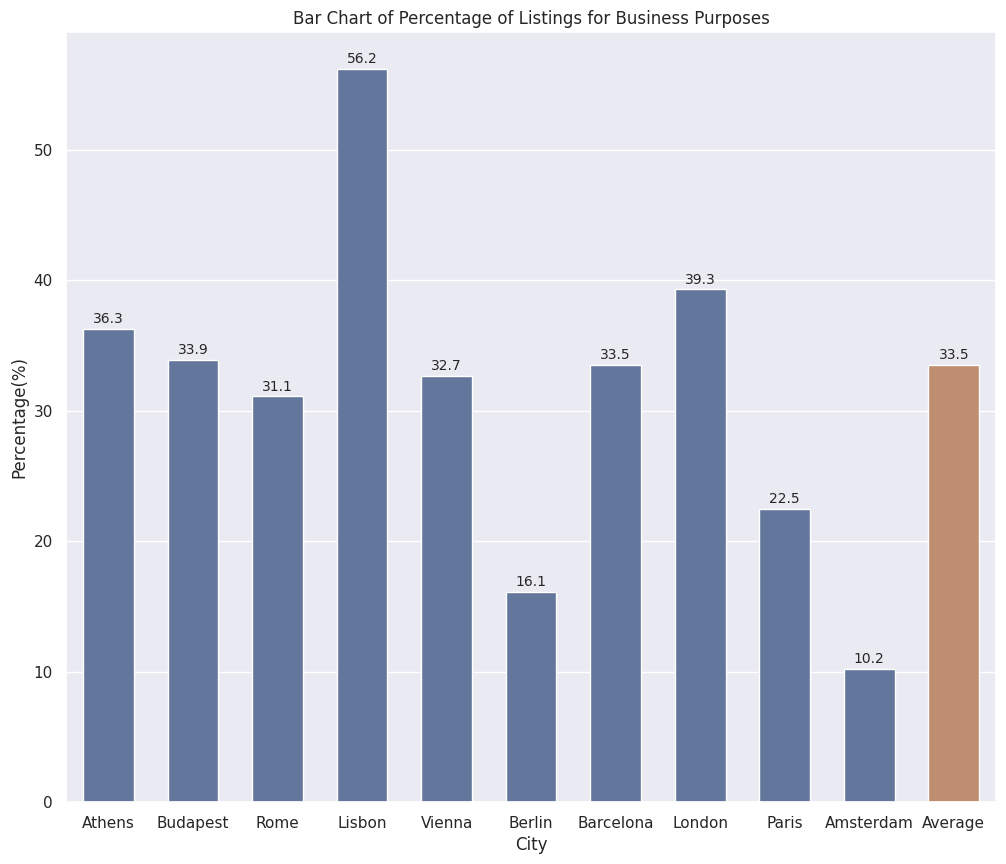

In [50]:
plt.figure(figsize=(12, 10))
sns.set_theme()
bar_plot = sns.barplot(x='city', y='biz_percentage(%)', data=all_listing_comparisons_by_city,
            palette=color_palette, width=0.6)
plt.rcParams['font.size'] = 10
bar_plot.bar_label(bar_plot.containers[0], fmt='%.1f', padding=2)
plt.xlabel('City')
plt.ylabel('Percentage(%)')
plt.title('Bar Chart of Percentage of Listings for Business Purposes')

The percentage of listings for business purposes is much higher than average in Lisbon, and much lower than average in Berlin and Amsterdam.

In [51]:
biz_by_city_weekday = all_airbnb_prices.groupby(['city', 'weekday']).biz.sum().reset_index()
listing_by_city_weekday = all_airbnb_prices.groupby(['city', 'weekday']).realSum.count().reset_index()
listing_by_city_weekday_biz = listing_by_city_weekday.merge(biz_by_city_weekday)
listing_by_city_weekday_biz['biz_percentage'] = round(listing_by_city_weekday_biz['biz']/listing_by_city_weekday_biz['realSum'] * 100, 1)

weekday_biz_sum = listing_by_city_weekday_biz.query('weekday == 1')['biz'].sum()
weekday_total_sum = listing_by_city_weekday_biz.query('weekday == 1')['realSum'].sum()
weekend_biz_sum = listing_by_city_weekday_biz.query('weekday == 0')['biz'].sum()
weekend_total_sum = listing_by_city_weekday_biz.query('weekday == 0')['realSum'].sum()
listing_by_city_weekday_biz['city'] = pd.Categorical(listing_by_city_weekday_biz['city'], categories=realSum_rank, ordered=True)
listing_by_city_weekday_biz = listing_by_city_weekday_biz.sort_values(by='city')

total_weekday_biz = pd.Series({'city': 'Average',
                               'weekday': 0,
                               'realSum': weekend_total_sum,
                               'biz': weekend_biz_sum,
                               'biz_percentage': round(weekend_biz_sum/weekend_total_sum * 100, 1)})
total_weekend_biz = pd.Series({'city': 'Average',
                               'weekday': 1,
                               'realSum': weekday_total_sum,
                               'biz': weekday_biz_sum,
                               'biz_percentage': round(weekday_biz_sum/weekday_total_sum * 100, 1)})
listing_by_city_weekday_biz = pd.concat([listing_by_city_weekday_biz,
                                         total_weekday_biz.to_frame().transpose(),
                                         total_weekend_biz.to_frame().transpose()],
                                        ignore_index=True)

Text(0.5, 1.0, 'Bar Chart of Percentage of Listings for Business Purposes Separated by Weekday or Weekend')

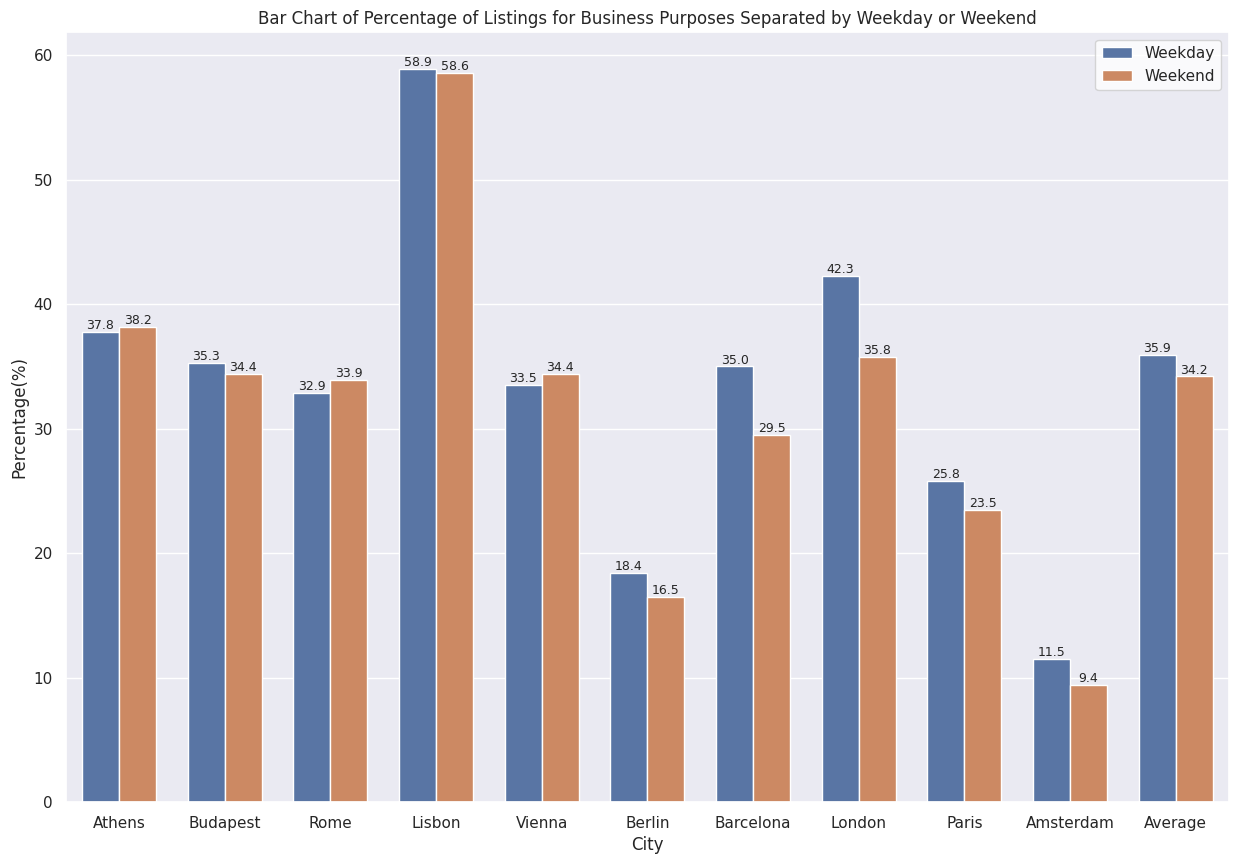

In [52]:
plt.figure(figsize=(15, 10))
sns.set_theme()
bar_plot = sns.barplot(x='city', y='biz_percentage', hue="weekday",
                       data=listing_by_city_weekday_biz,
                       hue_order=[1, 0], width=0.7)
plt.rcParams['font.size'] = 9
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt="%.1f")
h, _ = bar_plot.get_legend_handles_labels()
bar_plot.legend(h, ['Weekday', 'Weekend'], facecolor='white')
plt.xlabel('City')
plt.ylabel('Percentage(%)')
plt.title('Bar Chart of Percentage of Listings for Business Purposes Separated by Weekday or Weekend')

From the figure, it can be seen that in most cities, the percentage of listings for business purposes is slightly higher on the weekdays than the weekends, which is expected. However the discrepancy is not too great, as business travellers often stay longer, which means that business listings will be available in the weekends as well.

Text(0.5, 1.0, 'Bar Chart of AirBnB Prices for all AirBnBs Separated by Whether Listing is for Business or Not')

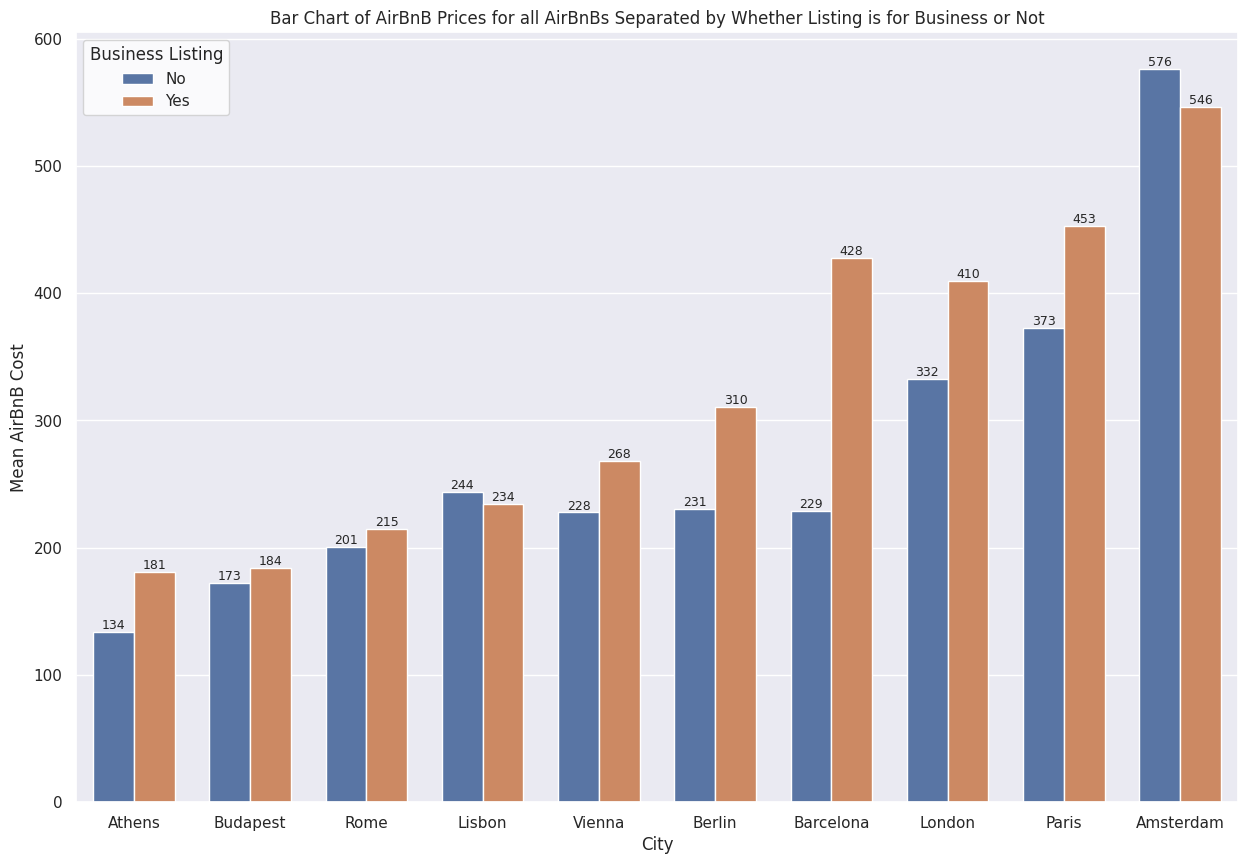

In [53]:
plt.figure(figsize=(15,10))
sns.set_theme()
bar_plot = sns.barplot(x = "city", y = "realSum", hue="biz",
            data=all_airbnb_prices, estimator="mean", errorbar=None,
            order=realSum_rank, hue_order=[0, 1], width=0.7)
plt.rcParams['font.size'] = 9
for container in bar_plot.containers:
  bar_plot.bar_label(container, fmt='%.f')
plt.legend(facecolor='white', title='Business Listing', labels=['No', 'Yes'])
plt.ylabel('Mean AirBnB Cost')
plt.xlabel('City')
plt.title('Bar Chart of AirBnB Prices for all AirBnBs Separated by Whether Listing is for Business or Not')

Business listings can be observed to be generally more expensive than non-business listings. This is the expected conclusion as businesses are more likely to spend more on accomodation than tourists.

In [63]:
# pio.renderers.default = "notebook_connected"

fig = px.scatter_mapbox(
    all_airbnb_prices.query('city == "Athens" and duplicated == False'),
    lat="lat", lon="lng",
    color="metro_dist",
    size="realSum",
    mapbox_style="open-street-map",
    hover_data={"realSum": ':.3f',
                "room_type": True,
                "metro_dist": ':.3f',
                "dist": ':.3f',
                "lat": ':.5f',
                "lng": ':.5f'},
    color_continuous_scale=px.colors.sequential.Bluered,
    size_max=20, zoom=0, height=1300)

fig.update_layout(title={"text": "Map of Athens AirBnBs Sized on Price and Colored on Distance from Nearest Metro",
                         "xref": "paper",
                         "xanchor": "auto",
                         "x": 0.5})

athens_bounds_west = math.floor(all_airbnb_prices.query('city == "Athens" and duplicated == False')['lng'].min() * 10)/10
athens_bounds_east = math.ceil(all_airbnb_prices.query('city == "Athens" and duplicated == False')['lng'].max() * 10)/10
athens_bounds_south = math.floor(all_airbnb_prices.query('city == "Athens" and duplicated == False')['lat'].min() * 10)/10
athens_bounds_north = math.ceil(all_airbnb_prices.query('city == "Athens" and duplicated == False')['lat'].max() * 10)/10

fig.update_layout(mapbox_bounds={"west": 23.61120,
                                 "east": 23.86352,
                                 "south": 37.91931,
                                 "north": 38.05856})


fig.show()

In [67]:
fig = px.scatter_mapbox(
    all_airbnb_prices.query('city == "Budapest" and duplicated == False'),
    lat="lat", lon="lng",
    color="metro_dist",
    size="realSum",
    mapbox_style="open-street-map",
    hover_data={"realSum": ':.3f',
                "room_type": True,
                "metro_dist": ':.3f',
                "dist": ':.3f',
                "lat": ':.5f',
                "lng": ':.5f'},
    color_continuous_scale=px.colors.sequential.Bluered,
    size_max=30, zoom=0, height=1300)

fig.update_layout(title={"text": "Map of Budapest AirBnBs Sized on Price and Colored on Distance from Nearest Metro",
                         "xref": "paper",
                         "xanchor": "auto",
                         "x": 0.5})

budapest_bounds_west = math.floor(all_airbnb_prices.query('city == "Budapest" and duplicated == False')['lng'].min() * 10)/10
budapest_bounds_east = math.ceil(all_airbnb_prices.query('city == "Budapest" and duplicated == False')['lng'].max() * 10)/10
budapest_bounds_south = math.floor(all_airbnb_prices.query('city == "Budapest" and duplicated == False')['lat'].min() * 10)/10
budapest_bounds_north = math.ceil(all_airbnb_prices.query('city == "Budapest" and duplicated == False')['lat'].max() * 10)/10

fig.update_layout(mapbox_bounds={"west": 18.92,
                                 "east": 19.31,
                                 "south": 47.38,
                                 "north": 47.61})


fig.show()

In [69]:
fig = px.scatter_mapbox(
    all_airbnb_prices.query('city == "London" and duplicated == False'),
    lat="lat", lon="lng",
    color="metro_dist",
    size="realSum",
    mapbox_style="open-street-map",
    hover_data={"realSum": ':.3f',
                "room_type": True,
                "metro_dist": ':.3f',
                "dist": ':.3f',
                "lat": ':.5f',
                "lng": ':.5f'},
    color_continuous_scale=px.colors.sequential.Bluered,
    size_max=40, zoom=0, height=1100)

fig.update_layout(title={"text": "Map of London AirBnBs Sized on Price and Colored on Distance from Nearest Metro",
                         "xref": "paper",
                         "xanchor": "auto",
                         "x": 0.5})

london_bounds_west = math.floor(all_airbnb_prices.query('city == "London" and duplicated == False')['lng'].min() * 10)/10
london_bounds_east = math.ceil(all_airbnb_prices.query('city == "London" and duplicated == False')['lng'].max() * 10)/10
london_bounds_south = math.floor(all_airbnb_prices.query('city == "London" and duplicated == False')['lat'].min() * 10)/10
london_bounds_north = math.ceil(all_airbnb_prices.query('city == "London" and duplicated == False')['lat'].max() * 10)/10

fig.update_layout(mapbox_bounds={"west": london_bounds_west,
                                 "east": london_bounds_east,
                                 "south": london_bounds_south,
                                 "north": london_bounds_north})


fig.show()

In [57]:
# Use plotly to plot positions of airbnbs with price/dist/metro_dist maybe a composite of the above
# try running with and without outliers

# remove very high outliers from data pool when running predictions
# Normalize dist and metro_dist before doing a joint plot with them
# normalize distance from city centre (maybe distance from metro as well)
# Potentially try to remove all outliers when running predictions
# Use linear regression and XgBoost and Neural Network for predicitions (try using GPU boosting)
# Use XgBoost importance and linear regression weights to determine most important features

# then the rest of the piecharts and barcharts
# Google airbnb policies in these cities and investigate, property prices in these cities as well
# During prediction, do a misprediction gradient, greater error has redder color
# Try both predicting with outliers and without

In [58]:
# -london-weekends explanation: a rough, slightly disorganized attempt at
# predicting prices and presenting data only for london weekends
# the lack of data, particularly for london weekends probably hindered
# quality of prediction
# Data was augmented by scraping websites for the busiest tourist attractions
# and metro stations and calculating distances from the airbnbs to these points
# Matplotlib was used instead of plotly to plot geographical data, with the map
# image being obtained from OpenStreetMap.org
# link the notebook

In [59]:
# -full notebook explanation: a full notebook with explanations of everything
# from data cleaning to exploratory data analysis and prediction, as well as
# interpretations obtained from the prediction and analysis steps. Diagrams
# and analyses are presented with a logical flow meant for easy consumption
# of the data for subsequent use in the business side, this contains plotly
# as svg only, no interactive diagrams

In [60]:
# -full notebook with interactive plotly plots: same as above notebook, but with
# interactive plotly plots that can be viewed on nbviewer site

In [61]:
# A markdown/latex/pdf summarising the findings of the notebook